Yu-Chun Su, Chih-Hsin Peng, Han-Nga Chan, Yu-Fang Liao, I-An Chien

notebook link: https://drive.google.com/file/d/14-p3WpToLfG8kGeztebeCtBAwiLPlRJQ/view?usp=sharing

# Dataset cleaning

In [ ]:
# delete the warning
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Finance

We are using specific variables to explain each aspect for the following reasons: Inventory turnover and asset turnover are employed to assess sales/demand, offering insights into a company's sales performance and product demand. Net profit margin (NPM) and advertising expenses/sales are chosen to understand pricing decisions, reflecting profitability and marketing expenditure's influence on pricing strategies. Research and development (R&D) sales serve as a proxy for innovation, indicating a company's investment in new product development and its potential impact on competitiveness. These variables collectively provide a comprehensive understanding of sales, pricing, and innovation aspects within the analyzed context.

In [ ]:
df_finance = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BA875_supply_chain/group project (1)/_Dataset 0 (All teams)_ Company Financials /WRDS_IBES_Company_Financials.csv")

# extracted the wanted column
df_finance = df_finance[['gvkey','adate',"npm","at_turn","adv_sale",'rd_sale','inv_turn']]
df_finance

# (x) public_date: the data for that year was not published until later.
# (o) adate = as-of date : date at which financial data or information is considered valid or applicable
# (x) qdate = query date: date on which a request for information or data is made

# drop the na value
df_finance = df_finance.dropna()
# create new 'year' column
df_finance['year'] = pd.to_datetime(df_finance['adate']).dt.year


### there are several rows in same year so we groupby the adate and take the mean for all the columns
df_finance = df_finance.groupby(by=['year','gvkey']).agg({
    'npm': 'mean',
    'at_turn': 'mean',
    'adv_sale': 'mean',
    'rd_sale': 'mean',
    'inv_turn': 'mean'
})
df_finance.reset_index(inplace=True)
df_finance

,year,gvkey,npm,at_turn,adv_sale,rd_sale,inv_turn
0,2008,1045,-0.0720,0.816000,0.006,0.000000,32.411000
1,2008,1050,0.0170,1.622000,0.005,0.000000,8.276000
2,2008,1075,0.0740,0.273000,0.000,0.000000,9.241000
3,2008,1078,0.1870,0.646000,0.000,0.091000,3.225000
4,2008,1104,0.0470,1.290000,0.017,0.004000,1.765000
...,...,...,...,...,...,...,...
38291,2022,187596,0.1906,0.037400,0.013,0.000000,21.478000
38292,2022,187740,0.6520,0.499000,0.000,0.220000,2.402000
38293,2022,260737,-10.1630,0.026857,0.000,4.796714,2.560429
38294,2022,264387,-0.0930,0.574500,0.000,0.098000,2.832000


## Sector

In [ ]:
df_sector = pd.read_csv("/content/drive/MyDrive/BA875_Operations_and_Supply_Chain_Analytics/Team Project/Dataset 1: CapitalIQ Trucost Environmental Activity/Full Dataset (Large and supplementary files)/CapitalIQ_Trucost_Revenue_by_Sector.csv")

# drop null value
df_sector.dropna(subset=['gvkey'],inplace=True)

# drop non-use column
df_sector.drop(['institutionid','tcsectorname','companyid','sectorperiodid',"streetaddress","streetaddress2","streetaddress3","streetaddress4","monthfounded","dayfounded","officephonevalue",'otherphonevalue', 'officefaxvalue', 'webpage', 'yearfounded','state','incorporation_state','incorporation_country','ticker', 'tcprimarysectorid','primarysectorname','tcsectorid','fiscalyear','di_324389_text'],axis=1,inplace=True)

### only keep when status = operating and operating subsidiary
df_sector_ops = df_sector[df_sector['status'].str.contains('Operating', case=False)]
                                                                      # upper and lower case letters are treated as the same
df_sector_ops.drop('status',axis=1,inplace=True)
df_sector_ops

,periodenddate,reportedcurrencyisocode,di_319523,di_319540,gvkey,companyname,companytype,simpleindustry,country,zipcode
119,2020-12-31,USD,36167.000000,100.0,122554.0,United Services Automobile Association,Private Company,Insurance,United States,78288-0001
120,2021-12-31,USD,37353.000000,100.0,122554.0,United Services Automobile Association,Private Company,Insurance,United States,78288-0001
121,2018-12-31,USD,25339.000000,100.0,122554.0,United Services Automobile Association,Private Company,Insurance,United States,78288-0001
130,2022-12-31,USD,2228.000000,100.0,63734.0,Voya Retirement Insurance and Annuity Company,Private Company,Insurance,United States,06095-4774
132,2022-12-31,USD,1731.000000,100.0,263562.0,Everlake Life Insurance Company,Private Company,Insurance,United States,60062-7127
...,...,...,...,...,...,...,...,...,...,...
5829944,2022-09-30,USD,0.565197,100.0,43140.0,Alpha Technology Group Limited,Public Company,IT Services,Hong Kong,NaN
5842390,2022-12-31,USD,16.219549,100.0,358709.0,ELSA Solutions S.p.A.,Public Company,Electrical Equipment,Italy,40026
5842391,2021-12-31,USD,14.277950,100.0,358709.0,ELSA Solutions S.p.A.,Public Company,Electrical Equipment,Italy,40026
5842392,2022-09-30,USD,0.089766,100.0,358653.0,"SEIYU KOGYO Co.,Ltd.",Public Company,Construction and Engineering,Japan,197-0802


## Activity

In [ ]:
df_activity = pd.read_csv("/content/drive/MyDrive/BA875_Operations_and_Supply_Chain_Analytics/Team Project/Dataset 1: CapitalIQ Trucost Environmental Activity/Full Dataset (Large and supplementary files)/CapitalIQ_Trucost_Environmental_Activity.csv")

# only extract wanted column
df_activity = df_activity[['periodenddate', 'reportedcurrencyisocode', 'gvkey', 'status', 'companytype', 'simpleindustry',
    'zipcode', 'di_319380', 'di_319382', 'di_319437', 'di_319439',
    'di_319445', 'di_319447', 'di_319467', 'di_319469',
    'di_319522', 'di_319532', 'di_319536', 'di_319545', 'di_319548', 'di_319550',
    'di_319560', 'di_319565', 'di_326709', 'di_327791']]

# drop null value
df_activity.dropna(subset=['gvkey'],inplace=True)
df_activity

,periodenddate,reportedcurrencyisocode,gvkey,status,companytype,simpleindustry,zipcode,di_319380,di_319382,di_319437,...,di_319522,di_319532,di_319536,di_319545,di_319548,di_319550,di_319560,di_319565,di_326709,di_327791
105,2018-12-31,USD,122554.0,Operating,Private Company,Insurance,78288-0001,0.099493,12.786641,0.514167,...,25339.000000,0.963120,67.634285,0.349460,3.224657,5470.979514,0.000000,18.387728,5.469113e+07,36609.720339
106,2020-12-31,USD,122554.0,Operating,Private Company,Insurance,78288-0001,0.143000,17.601000,0.739000,...,36167.000000,1.384000,93.229000,0.502000,4.468000,7625.280000,0.000000,25.970000,6.879875e+07,50907.982062
107,2021-12-31,USD,122554.0,Operating,Private Company,Insurance,78288-0001,0.142000,19.466000,0.734000,...,37353.000000,1.376000,101.986000,0.499000,4.819000,7241.550000,0.000000,27.385000,7.505389e+07,50958.173800
142,2018-12-31,USD,261111.0,Operating Subsidiary,Private Company,Insurance,48951,0.029618,3.806456,0.153063,...,7543.168000,0.286711,20.134053,0.104031,0.959948,1628.656127,0.000000,5.473843,1.628100e+07,10898.349220
144,2019-12-31,USD,261111.0,Operating Subsidiary,Private Company,Insurance,48951,0.011950,1.494868,0.061756,...,3091.646000,0.115679,7.933884,0.041973,0.383367,645.414363,0.000000,2.206674,6.059713e+06,4392.560745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654283,2020-09-30,USD,354546.0,Operating Subsidiary,Public Company,Construction and Engineering,44141,0.033706,0.593550,0.102454,...,155.943269,0.233265,3.617206,0.033176,0.106748,547.259054,0.047524,0.667658,2.029327e+06,1101.511747
2738697,2019-06-30,USD,353171.0,Operating,Public Company,Food Products,06980,0.307510,8.431594,0.320715,...,154.563158,0.997221,147.605220,0.047283,0.111006,883.379030,0.302825,93.681181,2.862546e+06,846.517939
2754957,2021-12-31,USD,353841.0,Operating,Public Company,Household Durables,25040,0.003251,0.019598,0.015276,...,20.293446,0.024734,0.112314,0.006207,0.004088,102.561000,0.000000,0.025783,9.314807e+04,32.552446
2763933,2020-12-31,USD,355456.0,Operating,Public Company,"Textiles, Apparel and Luxury Goods",20122,0.000093,0.002864,0.001185,...,0.938486,0.001764,0.028266,0.000260,0.000522,3.044242,0.000226,0.013074,9.885430e+03,4.887230


## Merge

In [ ]:
df_data1 = df_sector_ops.merge(df_activity , on =['gvkey','periodenddate'])
df_data1['year'] = pd.to_datetime(df_data1['periodenddate']).dt.year

In [ ]:
df = df_data1.merge(df_finance ,on=['gvkey',"year"],how='left')
df = df.dropna()

df = df.rename(columns={
    'periodenddate': 'period_end_date',
    'reportedcurrencyisocode_x': 'reported_currency_iso_code',
    'di_319523': 'company_sector_revenue',
    'di_319540': 'sector_revenue_to_total_revenue',
    'gvkey': 'gv_key',
    'companyname': 'company_name',
    'companytype_x': 'company_type',
    'simpleindustry_x': 'industry',
    'zipcode_x': 'zip_code',
    'di_319380': 'direct_air_pollutants_cost',
    'di_319382': 'indirect_air_pollutants_cost',
    'di_319437': 'direct_ghg_cost',
    'di_319439': 'indirect_ghg_cost',
    'di_319445': 'direct_lwp',
    'di_319447': 'indirect_lwp',
    'di_319467': 'indirect_natural_resources_cost',
    'di_319469': 'direct_natural_resources_cost',
    'di_319522': 'total_revenue_trucost',
    'di_319532': 'direct_cost',
    'di_319536': 'indirect_cost',
    'di_319545': 'direct_waste_cost',
    'di_319548': 'indirect_waste_cost',
    'di_319550': 'waste_landfill',
    'di_319560': 'direct_water_cost',
    'di_319565': 'indirect_water_cost',
    'di_326709': 'indirect_water_cooling_cost',
    'di_327791': 'indirect_landfill_waste_cost'
})

# drop non use columns
#df = df.drop(['Unnamed: 0', 'reportedcurrencyisocode_y', 'companytype_y', 'simpleindustry_y', 'zipcode_y', 'status'], axis = 1)
df = df.drop(['reportedcurrencyisocode_y', 'companytype_y', 'simpleindustry_y', 'zipcode_y', 'status'], axis = 1)
df

,period_end_date,reported_currency_iso_code,company_sector_revenue,sector_revenue_to_total_revenue,gv_key,company_name,company_type,industry,country,zip_code,...,direct_water_cost,indirect_water_cost,indirect_water_cooling_cost,indirect_landfill_waste_cost,year,npm,at_turn,adv_sale,rd_sale,inv_turn
12,2018-12-31,USD,93.624,5.749062,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.317161,3.380196e+06,1900.093435,2018,0.232500,0.053750,0.017,0.0,1.886000
13,2018-12-31,USD,1155.487,70.953676,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.317161,3.380196e+06,1900.093435,2018,0.232500,0.053750,0.017,0.0,1.886000
14,2018-12-31,USD,379.398,23.297261,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.317161,3.380196e+06,1900.093435,2018,0.232500,0.053750,0.017,0.0,1.886000
15,2017-12-31,USD,345.086,22.417556,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.211866,3.279080e+06,1843.003941,2017,0.215000,0.052000,0.017,0.0,0.661500
16,2017-12-31,USD,110.938,7.206780,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.211866,3.279080e+06,1843.003941,2017,0.215000,0.052000,0.017,0.0,0.661500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337924,2020-12-31,USD,215.916,100.000000,39500.0,a.k.a. Brands Holding Corp.,Public Company,Specialty Retail,United States,94104,...,0.000,1.046000,1.925811e+06,503.296688,2020,-0.002000,0.925000,0.037,0.0,2.411000
337926,2020-12-26,USD,560.067,100.000000,39542.0,"Sovos Brands, Inc.",Public Company,Food Products,United States,80027,...,1.015,81.936000,9.800520e+06,4487.938668,2020,0.008000,0.591000,0.069,0.0,7.479000
337928,2020-12-31,USD,282.250,100.000000,39544.0,"Olaplex Holdings, Inc.",Public Company,Personal Care Products,United States,93108,...,1.165,2.831000,2.093246e+06,1453.391999,2020,0.352000,0.370000,0.009,0.0,1.896000
337931,2021-12-31,USD,3502.000,100.000000,39651.0,Sylvamo Corporation,Public Company,Paper and Forest Products,United States,38119,...,112.055,69.700000,8.885761e+07,36043.526632,2021,0.085364,1.255727,0.000,0.0,7.489909


# EDA

## Create Dataframe For EDA



In [ ]:
df_finance_plot = pd.read_csv('/content/drive/MyDrive/BA875_Operations_and_Supply_Chain_Analytics/group project/_Dataset 0 (All teams)_ Company Financials /WRDS_IBES_Company_Financials.csv')
df_finance_plot = df_finance_plot [['gvkey','adate',"npm",'rd_sale','staff_sale','aftret_equity','dpr']]

# (x) public_date: the data for that year was not published until later.
# (o) adate = as-of date : date at which financial data or information is considered valid or applicable
# (x) qdate = query date: date on which a request for information or data is made

# drop the na value
df_finance_plot = df_finance_plot.dropna()
# create new 'year' column
df_finance_plot['year'] = pd.to_datetime(df_finance_plot['adate']).dt.year


### there are several rows in same year so we groupby the adate and take the mean for all the columns
df_finance_plot = df_finance_plot.groupby(by=['year','gvkey']).agg({
    'npm': 'mean',
    'staff_sale': 'mean',
    'aftret_equity': 'mean',
    'rd_sale': 'mean',
    'dpr': 'mean'
})
df_finance_plot.reset_index(inplace=True)
df_finance_plot

,year,gvkey,npm,staff_sale,aftret_equity,rd_sale,dpr
0,2008,1050,0.0170,0.000,0.0620,0.0000,0.0000
1,2008,1075,0.0740,0.000,0.0710,0.0000,0.8410
2,2008,1076,0.0640,0.000,0.1390,0.0000,0.0340
3,2008,1078,0.1870,0.000,0.3000,0.0910,0.4210
4,2008,1104,0.0470,0.000,0.1160,0.0040,0.2450
...,...,...,...,...,...,...,...
36218,2022,186858,0.0120,0.000,0.0680,0.0000,0.5930
36219,2022,187462,0.2128,0.000,-2.0136,0.0806,0.4074
36220,2022,187575,0.0649,0.000,0.2818,0.0000,1.0182
36221,2022,187596,0.1906,0.431,0.0736,0.0000,0.1832


In [ ]:
df_plot = df_data1.merge(df_finance_plot ,on=['gvkey',"year"],how='left')
df_plot = df_plot.dropna()

df_plot = df_plot.rename(columns={
    'periodenddate': 'period_end_date',
    'reportedcurrencyisocode_x': 'reported_currency_iso_code',
    'di_319523': 'company_sector_revenue',
    'di_319540': 'sector_revenue_to_total_revenue',
    'gvkey': 'gv_key',
    'companyname': 'company_name',
    'companytype_x': 'company_type',
    'simpleindustry_x': 'industry',
    'zipcode_x': 'zip_code',
    'di_319380': 'direct_air_pollutants_cost',
    'di_319382': 'indirect_air_pollutants_cost',
    'di_319437': 'direct_ghg_cost',
    'di_319439': 'indirect_ghg_cost',
    'di_319445': 'direct_lwp',
    'di_319447': 'indirect_lwp',
    'di_319467': 'indirect_natural_resources_cost',
    'di_319469': 'direct_natural_resources_cost',
    'di_319522': 'total_revenue_trucost',
    'di_319532': 'direct_cost',
    'di_319536': 'indirect_cost',
    'di_319545': 'direct_waste_cost',
    'di_319548': 'indirect_waste_cost',
    'di_319550': 'waste_landfill',
    'di_319560': 'direct_water_cost',
    'di_319565': 'indirect_water_cost',
    'di_326709': 'indirect_water_cooling_cost',
    'di_327791': 'indirect_landfill_waste_cost'
})

# drop non use columns
df_plot = df_plot.drop(['reportedcurrencyisocode_y', 'companytype_y', 'simpleindustry_y', 'zipcode_y', 'status'], axis = 1)
df_plot

,period_end_date,reported_currency_iso_code,company_sector_revenue,sector_revenue_to_total_revenue,gv_key,company_name,company_type,industry,country,zip_code,...,direct_water_cost,indirect_water_cost,indirect_water_cooling_cost,indirect_landfill_waste_cost,year,npm,staff_sale,aftret_equity,rd_sale,dpr
12,2018-12-31,USD,93.624,5.749062,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.317161,3.380196e+06,1900.093435,2018,0.232500,0.316,0.116000,0.0,0.294000
13,2018-12-31,USD,1155.487,70.953676,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.317161,3.380196e+06,1900.093435,2018,0.232500,0.316,0.116000,0.0,0.294000
14,2018-12-31,USD,379.398,23.297261,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.317161,3.380196e+06,1900.093435,2018,0.232500,0.316,0.116000,0.0,0.294000
15,2017-12-31,USD,345.086,22.417556,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.211866,3.279080e+06,1843.003941,2017,0.215000,0.344,0.106750,0.0,0.324000
16,2017-12-31,USD,110.938,7.206780,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.000,1.211866,3.279080e+06,1843.003941,2017,0.215000,0.344,0.106750,0.0,0.324000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337924,2020-12-31,USD,215.916,100.000000,39500.0,a.k.a. Brands Holding Corp.,Public Company,Specialty Retail,United States,94104,...,0.000,1.046000,1.925811e+06,503.296688,2020,-0.002000,0.000,-0.005000,0.0,0.000000
337926,2020-12-26,USD,560.067,100.000000,39542.0,"Sovos Brands, Inc.",Public Company,Food Products,United States,80027,...,1.015,81.936000,9.800520e+06,4487.938668,2020,0.008000,0.000,0.013000,0.0,0.000000
337928,2020-12-31,USD,282.250,100.000000,39544.0,"Olaplex Holdings, Inc.",Public Company,Personal Care Products,United States,93108,...,1.165,2.831000,2.093246e+06,1453.391999,2020,0.352000,0.000,0.319000,0.0,0.000000
337931,2021-12-31,USD,3502.000,100.000000,39651.0,Sylvamo Corporation,Public Company,Paper and Forest Products,United States,38119,...,112.055,69.700000,8.885761e+07,36043.526632,2021,0.085364,0.000,0.473364,0.0,0.002909


In [ ]:
df_plot = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BA875_supply_chain/group project_clean + eda/df_plot.csv")
df_plot.drop(['Unnamed: 0'],axis=1,inplace=True)
df_plot.head()

,period_end_date,reported_currency_iso_code,company_sector_revenue,sector_revenue_to_total_revenue,gv_key,company_name,company_type,industry,country,zip_code,...,direct_water_cost,indirect_water_cost,indirect_water_cooling_cost,indirect_landfill_waste_cost,year,npm,staff_sale,aftret_equity,rd_sale,dpr
0,2018-12-31,USD,93.624,5.749062,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.0,1.317161,3.380196e+06,1900.093435,2018,0.2325,0.316,0.11600,0.0,0.294
1,2018-12-31,USD,1155.487,70.953676,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.0,1.317161,3.380196e+06,1900.093435,2018,0.2325,0.316,0.11600,0.0,0.294
2,2018-12-31,USD,379.398,23.297261,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.0,1.317161,3.380196e+06,1900.093435,2018,0.2325,0.316,0.11600,0.0,0.294
3,2017-12-31,USD,345.086,22.417556,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.0,1.211866,3.279080e+06,1843.003941,2017,0.2150,0.344,0.10675,0.0,0.324
4,2017-12-31,USD,110.938,7.206780,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.0,1.211866,3.279080e+06,1843.003941,2017,0.2150,0.344,0.10675,0.0,0.324


## Financial Sector: Top and Bottom 10 Pollution Companies


> We set `total_revenue_trucost` as our benchmark to examine and compare the financial statement conditions of the top 10 pollution companies and the bottom 10 pollution companies. This includes metrics such as `NPM` (Net Profit Margin), `RD_Sale` (R&D expenditure / Revenue), `Staff_Sale` (Labor expense / Revenue), `Aftret_Equity` (EBT / Equity), and `DPR` (Dividend Payout Ratio).


In [ ]:
plot1 = df_plot.groupby(by=['gv_key','company_name']).agg({
                                                        'npm': 'mean',
                                                        'rd_sale': 'mean',
                                                        'staff_sale': 'mean',
                                                        'aftret_equity': 'mean',
                                                        'dpr': 'mean',
                                                        'total_revenue_trucost': 'mean'})
plot1.head()

,,npm,rd_sale,staff_sale,aftret_equity,dpr,total_revenue_trucost
gv_key,company_name,,,,,,
1004.0,AAR Corp.,0.030333,0.000000,0.000000,0.060375,0.192583,1825.766667
1045.0,American Airlines Group Inc.,0.042500,0.000000,0.275143,-0.035107,0.128000,40026.285714
1050.0,CECO Environmental Corp.,0.024369,0.000000,0.000000,0.043537,0.540214,333.506236
1072.0,KYOCERA AVX Components Corporation,0.091264,0.007673,0.000000,0.065309,1.037886,1440.790188
1075.0,Pinnacle West Capital Corporation,0.121424,0.000000,0.000000,0.093509,0.689894,3464.434101


In [ ]:
# bench mark == 'total_revenue_trucost'
import numpy as np

top10_pollution = plot1['total_revenue_trucost'].nlargest(10)
top10_pollution = plot1.loc[top10_pollution.index]
top10_pollution = top10_pollution.reset_index()
display(top10_pollution)

bottom10_pollution = plot1['total_revenue_trucost'].nsmallest(10)
bottom10_pollution = plot1.loc[bottom10_pollution.index]
bottom10_pollution = bottom10_pollution.reset_index()
display(bottom10_pollution)

,gv_key,company_name,npm,rd_sale,staff_sale,aftret_equity,dpr,total_revenue_trucost
0,11259.0,Walmart Inc.,0.024900,0.000000,0.0,0.170400,0.543825,503787.466667
1,4503.0,Exxon Mobil Corporation,0.077120,0.003564,0.0,0.159274,0.686181,336226.707968
2,64768.0,"Amazon.com, Inc.",0.032784,0.110140,0.0,0.192081,0.000000,217254.219558
3,2176.0,Berkshire Hathaway Inc.,0.124356,0.000000,0.0,0.101387,0.000000,210755.599428
4,10903.0,UnitedHealth Group Incorporated,0.052468,0.000000,0.0,0.229278,0.253053,198815.105352
5,7241.0,CVS Health Corporation,0.028260,0.000000,0.0,0.110384,0.349477,196080.255204
6,1690.0,Apple Inc.,0.225860,0.039811,0.0,0.501136,0.172429,186532.514286
7,2991.0,Chevron Corporation,0.072149,0.003584,0.0,0.106630,1.048840,171264.851477
8,7171.0,McKesson Corporation,0.009331,0.002189,0.0,-0.123162,0.806426,163960.243243
9,9899.0,AT&T Inc.,0.092019,0.009005,0.0,0.099192,1.792752,155237.272258


,gv_key,company_name,npm,rd_sale,staff_sale,aftret_equity,dpr,total_revenue_trucost
0,19534.0,"Concert Pharmaceuticals, Inc.",808.935375,276.618125,0.0,0.794000,0.0000,0.118000
1,165215.0,"Alaunos Therapeutics, Inc.",-363.820000,58.448750,0.0,-1.390750,0.0710,0.146000
2,147183.0,Comstock Inc.,60.964000,0.000000,0.0,0.381500,0.0000,0.201700
3,39427.0,Momentus Inc.,-135.400625,218.653500,0.0,-0.263250,0.0000,0.330000
4,37633.0,Clene Inc.,36.122000,76.439500,0.0,-6.265500,0.0000,0.723000
5,39525.0,"Humacyte, Inc.",16.509600,34.065400,0.0,0.291000,0.0000,1.263000
6,184957.0,Workhorse Group Inc.,10.720500,5.251750,0.0,0.000500,0.0000,1.392500
7,39510.0,"eFFECTOR Therapeutics, Inc.",10.401375,9.610875,0.0,2.866125,0.0000,1.430000
8,17498.0,"Chimerix, Inc.",4.648000,2.622000,0.0,2.472000,0.0000,1.979000
9,185908.0,"Talphera, Inc.",21.978200,2.452600,0.0,-1.616600,0.0012,2.818001


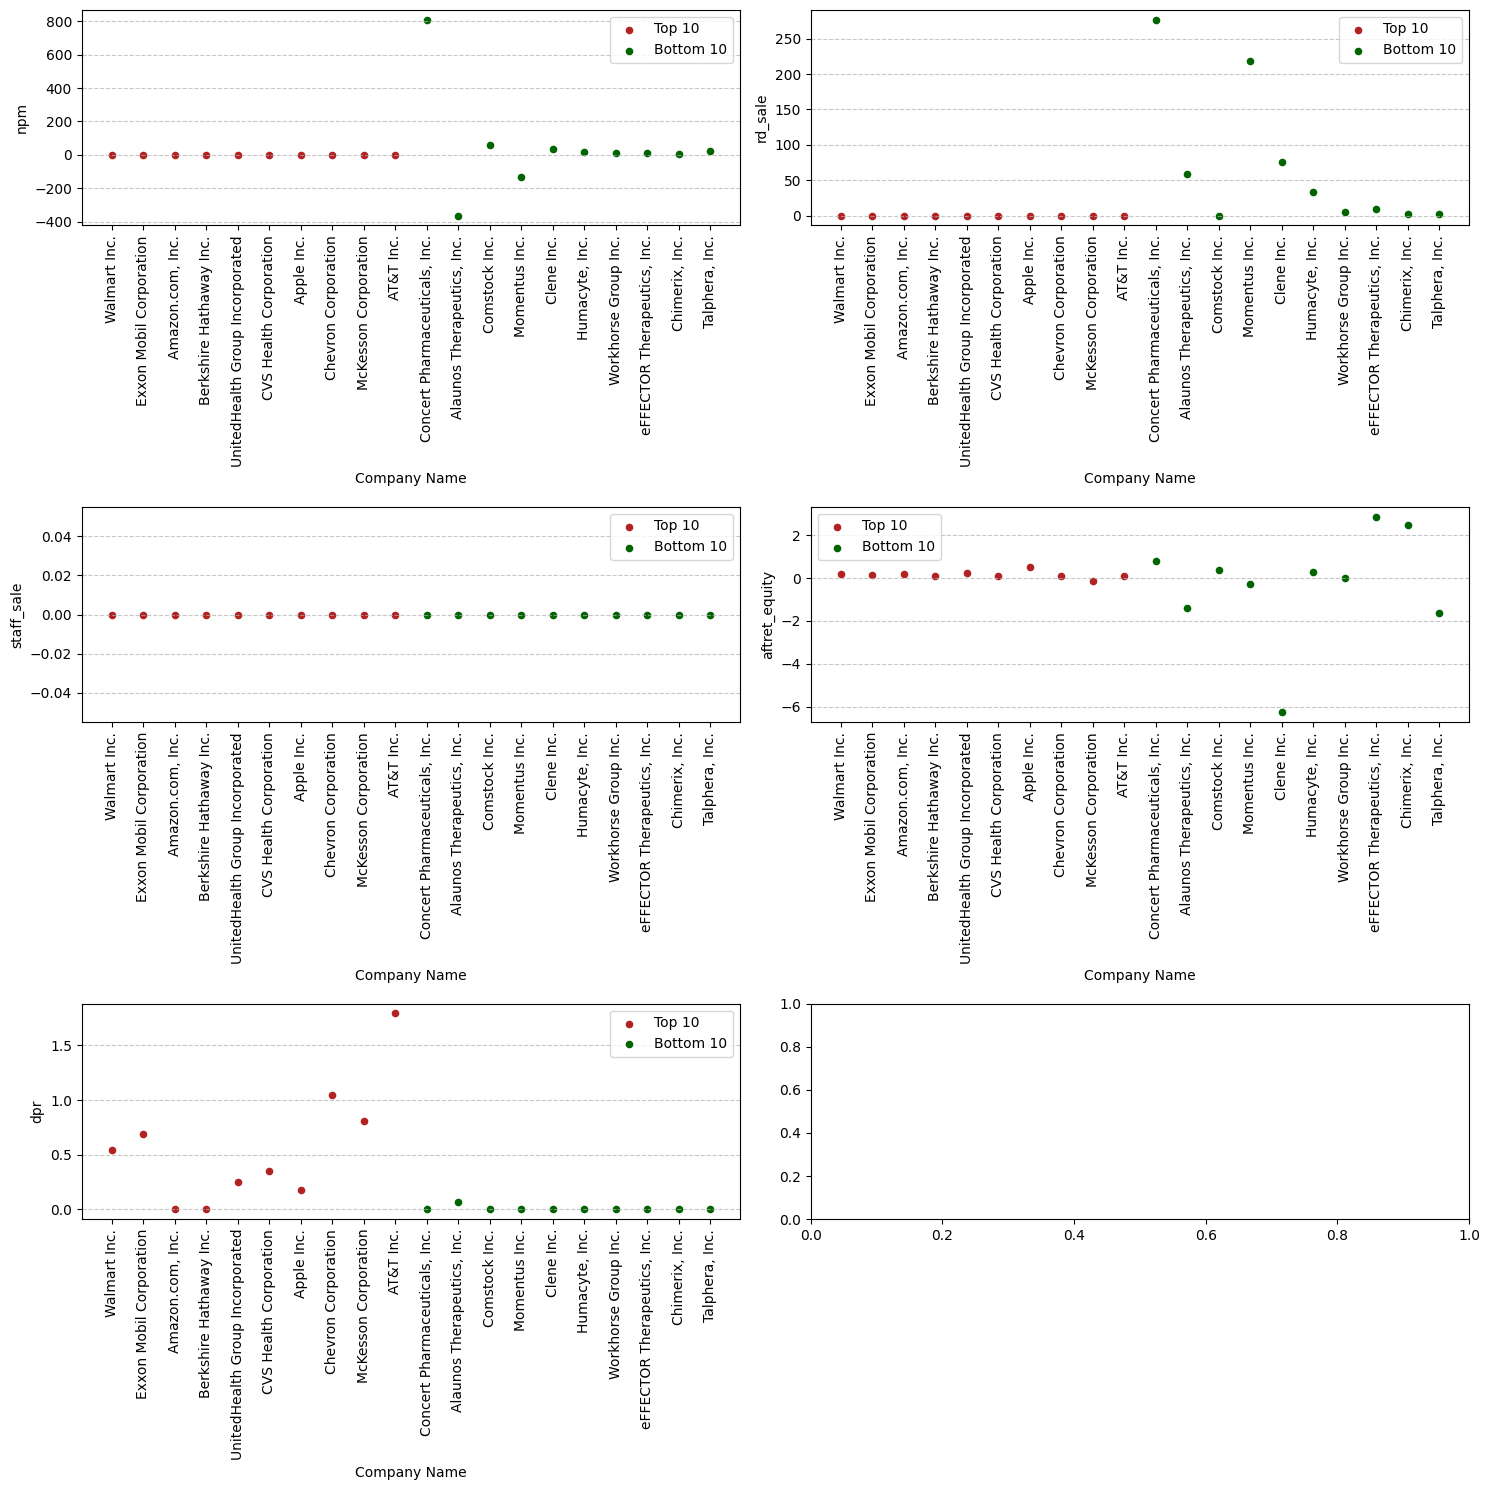

In [ ]:
import matplotlib.pyplot as plt

columns_to_plot = ['npm',	'rd_sale',	'staff_sale',	'aftret_equity','dpr']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].scatter(top10_pollution['company_name'], top10_pollution[column], color='firebrick', label='Top 10', s=20)
    axes[i].scatter(bottom10_pollution['company_name'], bottom10_pollution[column], color='darkgreen', label='Bottom 10', s=20)
    axes[i].set_xlabel("Company Name")
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].legend()
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

• `npm`: The net profit margin reflects the profit a company generates after deducting all expenses, including marketing, research and development, depreciation, interest, and taxes. Its main purpose is to gauge how efficiently a company manages expenses to maximize net income, with higher values indicating greater profitability. The plot reveals that all companies in the top 10 most polluting group have relatively small net profit margins, each under 0.22. In contrast, companies in the bottom 10 less polluting group exhibit more fluctuation in net profit margin, ranging from -363 to +808. Besides, their overall net profit margin is higher on average compared to the top 10 most polluting group.

• `npm` and `rd_sale`: The ratio RD_Sale is linked to ESG's **environmental** aspects. R&D expenditure to revenue allows us to assess whether a company has future competitiveness and growth potential. A higher value indicates that the company is committed to innovation and product development, suggesting significant investment in future growth initiatives. Additionally, companies with a higher R&D to sales ratio may allocate more resources towards developing environmentally friendly products and technologies. The graph clearly shows that companies in the bottom 10 less polluting group have a higher R&D to sales ratio than the top 10 most polluting group. Compared to their corresponding net profit margins, companies with higher net profit margins are more inclined to invest in producing eco-friendly products or developing renewable energy sources.

• `npm` and `staff_sale`: The Staff_Sale ratio is associated with ESG's **social** aspects. It is calculated by dividing the labor expenditure by the total revenue, indicating the proportion of revenue allocated to labor expenses such as salaries and benefits. A higher value suggests that a large proportion of the company's revenue is allocated to labor expenses. The graph reveals an interesting observation: regardless of a company's profitability, there is a tendency to allocate a minimal portion of revenue towards employee benefits.

• `npm` and `aftret_equity`: The ratio Aftret_Equity is linked to ESG's **governance** aspects. The after-tax return on total shareholder's equity indicates the portion of net income a company chooses to allocate to investors. A higher value suggests a greater distribution to investors, a positive indicator. The graph illustrates that most companies prioritize returning profits to investors to enhance shareholder value and attract investment for business growth and stock performance. Only a few companies are hesitant to distribute profits to investors.

• `npm` and `dpr`: The ratio DPR is linked to ESG's **governance** aspects. The dividend payout ratio shows the portion of earnings paid to shareholders as dividends. In the case of the top 10 most polluting companies, they are more willing to pay dividends to shareholders, possibly due to their capital-intensive operations and investor expectations for returns. Conversely, the bottom 10 less polluting companies may prioritize reinvesting profits into sustainability efforts rather than paying dividends.

## Industry and Country Sector: Top and Bottom 1 in Water and GHG Costs

> In the following regression analysis, we found that direct and indirect water and GHG costs are significant indicators. Therefore, we aim to investigate which industries and countries are spending the most and least on these two costs.



First, we need to calculate the percentage of spending on direct and indirect GHG costs, as well as water costs, for each industry and country that exceeds the total mean of direct and indirect GHG costs and water costs.

In [ ]:
#sum direct and indirect of ghg and water cost respectively
df_plot['ghg'] = df_plot['direct_ghg_cost'] + df_plot['indirect_ghg_cost']
df_plot['water'] = df_plot['direct_water_cost'] + df_plot['indirect_water_cost']
plot2 = df_plot
plot2.head()

,period_end_date,reported_currency_iso_code,company_sector_revenue,sector_revenue_to_total_revenue,gv_key,company_name,company_type,industry,country,zip_code,...,indirect_water_cooling_cost,indirect_landfill_waste_cost,year,npm,staff_sale,aftret_equity,rd_sale,dpr,ghg,water
0,2018-12-31,USD,93.624,5.749062,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,3.380196e+06,1900.093435,2018,0.2325,0.316,0.11600,0.0,0.294,1.865384,1.317161
1,2018-12-31,USD,1155.487,70.953676,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,3.380196e+06,1900.093435,2018,0.2325,0.316,0.11600,0.0,0.294,1.865384,1.317161
2,2018-12-31,USD,379.398,23.297261,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,3.380196e+06,1900.093435,2018,0.2325,0.316,0.11600,0.0,0.294,1.865384,1.317161
3,2017-12-31,USD,345.086,22.417556,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,3.279080e+06,1843.003941,2017,0.2150,0.344,0.10675,0.0,0.324,1.788829,1.211866
4,2017-12-31,USD,110.938,7.206780,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,3.279080e+06,1843.003941,2017,0.2150,0.344,0.10675,0.0,0.324,1.788829,1.211866


In [ ]:
#calculate average of ghg cost and water cost
GHG_mean = plot2['ghg'].mean()
print('ghg cost mean:', GHG_mean)
WATER_mean = plot2['water'].mean()
print('water cost mean:', WATER_mean)

ghg cost mean: 316.31123154744665
water cost mean: 192.74832959375163


In [ ]:
#change ghg cost and water cost bigger than mean to true and ghg cost smaller than mean to false
plot2['GHG'] = plot2['ghg'] > GHG_mean
plot2['WATER'] = plot2['water'] > WATER_mean

In [ ]:
#average ghg cost and water cost group by industry
industry_GHG = plot2.groupby('industry')['GHG'].mean()
industry_WATER = plot2.groupby('industry')['WATER'].mean()

In [ ]:
#filter ghg cost and water cost bigger than 0
industry_GHG = pd.DataFrame(industry_GHG)
industry_GHG = industry_GHG[industry_GHG['GHG'] != 0]
industry_WATER = pd.DataFrame(industry_WATER)
industry_WATER = industry_WATER[industry_WATER['WATER'] != 0]

In [ ]:
#filter first and last one into one dataset
industry_GHG = industry_GHG.sort_values(by = 'GHG', ascending = False)
first_row = industry_GHG.head(1)
last_row = industry_GHG.tail(1)
first_last_row_GHG = pd.concat([first_row, last_row])
first_last_row_GHG

,GHG
industry,
Industrial Conglomerates,0.801136
"Hotels, Restaurants and Leisure",0.003195


In [ ]:
#filter first and last one into one dataset
industry_WATER = industry_WATER.sort_values(by = 'WATER', ascending = False)
first_row = industry_WATER.head(1)
last_row = industry_WATER.tail(1)
first_last_row_WATER = pd.concat([first_row, last_row])
first_last_row_WATER

,WATER
industry,
Industrial Conglomerates,0.869318
Commercial Services and Supplies,0.001506


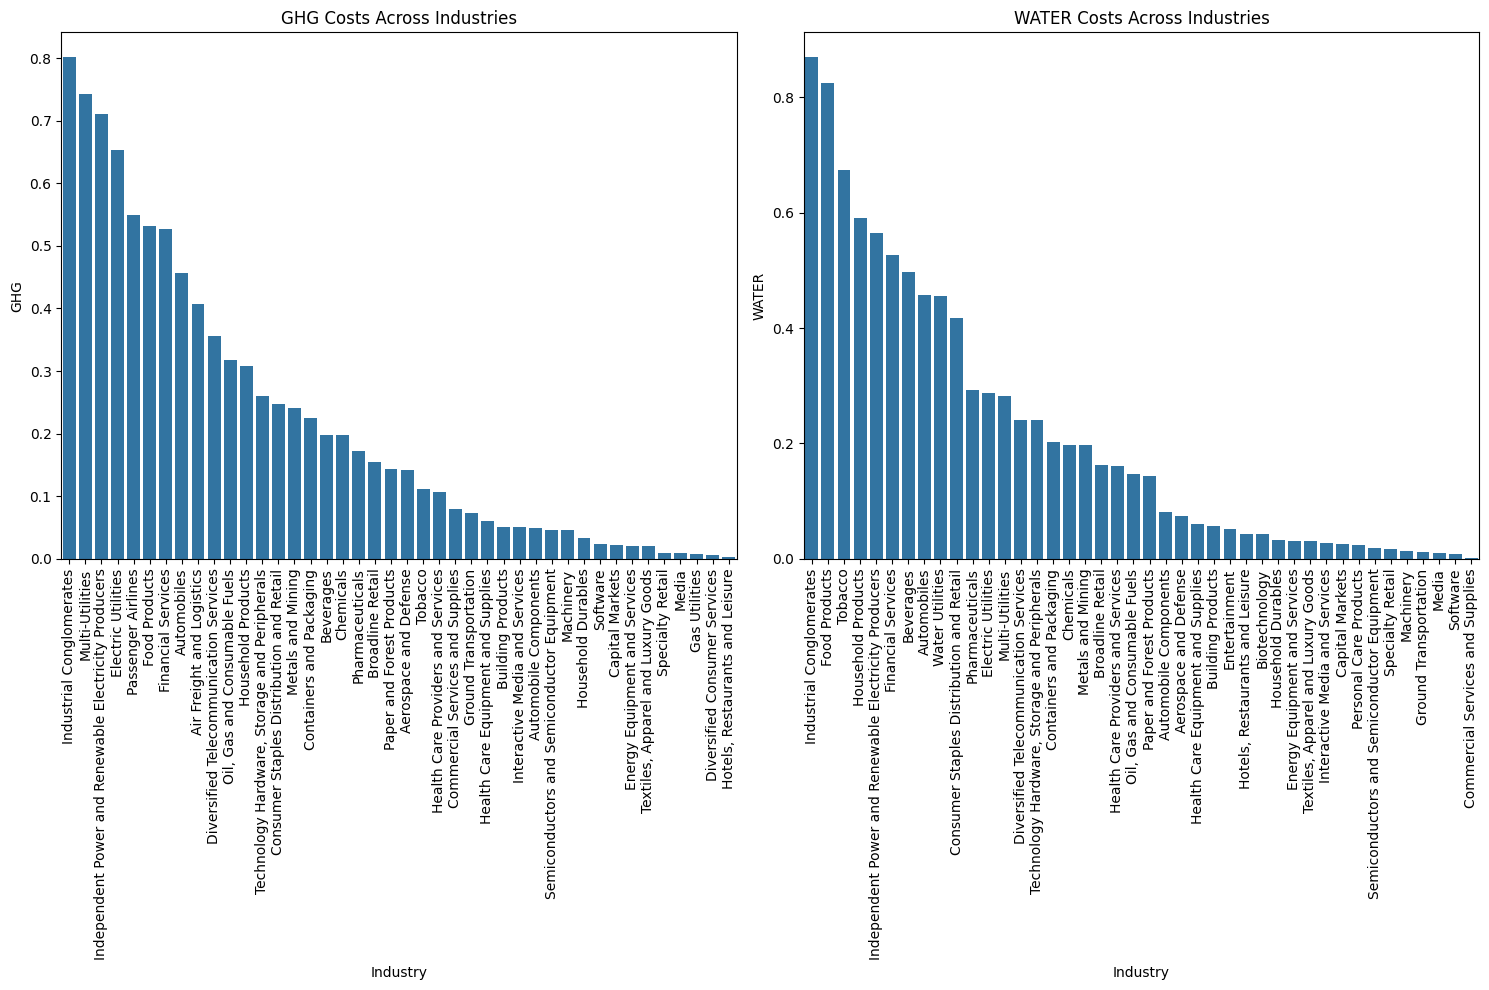

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot GHG costs across industries
sns.barplot(ax=axes[0], x='industry', y='GHG', data=industry_GHG)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('GHG')
axes[0].set_title('GHG Costs Across Industries')

# Plot WATER costs across industries
sns.barplot(ax=axes[1], x='industry', y='WATER', data=industry_WATER)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Industry')
axes[1].set_ylabel('WATER')
axes[1].set_title('WATER Costs Across Industries')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the above two plots, we observe that the top industry in terms of both costs is "Industrial Conglomerates," accounting for approximately 80%. This finding aligns with expectations since industrial sectors often generate substantial gas emissions during production processes.

Conversely, the bottom-ranking industries are "Hotels, Restaurants and Leisure" and "Commercial Services and Supplies." This result is logical given their reduced reliance on resource-intensive production methods compared to other sectors. These industries primarily engage in service-oriented activities, minimizing water consumption and greenhouse gas emissions.

In [ ]:
#calculate mean of ghg cost and water cost and then filter these two costs bigger than 0 respectively
country_GHG = plot2.groupby('country')['GHG'].mean()
country_GHG = pd.DataFrame(country_GHG)
country_GHG = country_GHG[country_GHG['GHG'] != 0]
country_WATER = plot2.groupby('country')['WATER'].mean()
country_WATER = pd.DataFrame(country_WATER)
country_WATER  = country_WATER [country_WATER ['WATER'] != 0]

In [ ]:
#filter first and last one into one dataset
country_GHG = country_GHG.sort_values(by = 'GHG', ascending = False)
first_row = country_GHG.head(1)
last_row = country_GHG.tail(1)
first_last_row_GHG_country = pd.concat([first_row, last_row])
first_last_row_GHG_country

,GHG
country,
Ireland,0.355932
Canada,0.061224


In [ ]:
#filter first and last one into one dataset
country_WATER = country_WATER.sort_values(by = 'WATER', ascending = False)
first_row = country_WATER.head(1)
last_row = country_WATER.tail(1)
first_last_row_WATER_country = pd.concat([first_row, last_row])
first_last_row_WATER_country

,WATER
country,
Ireland,0.305085
Canada,0.061224


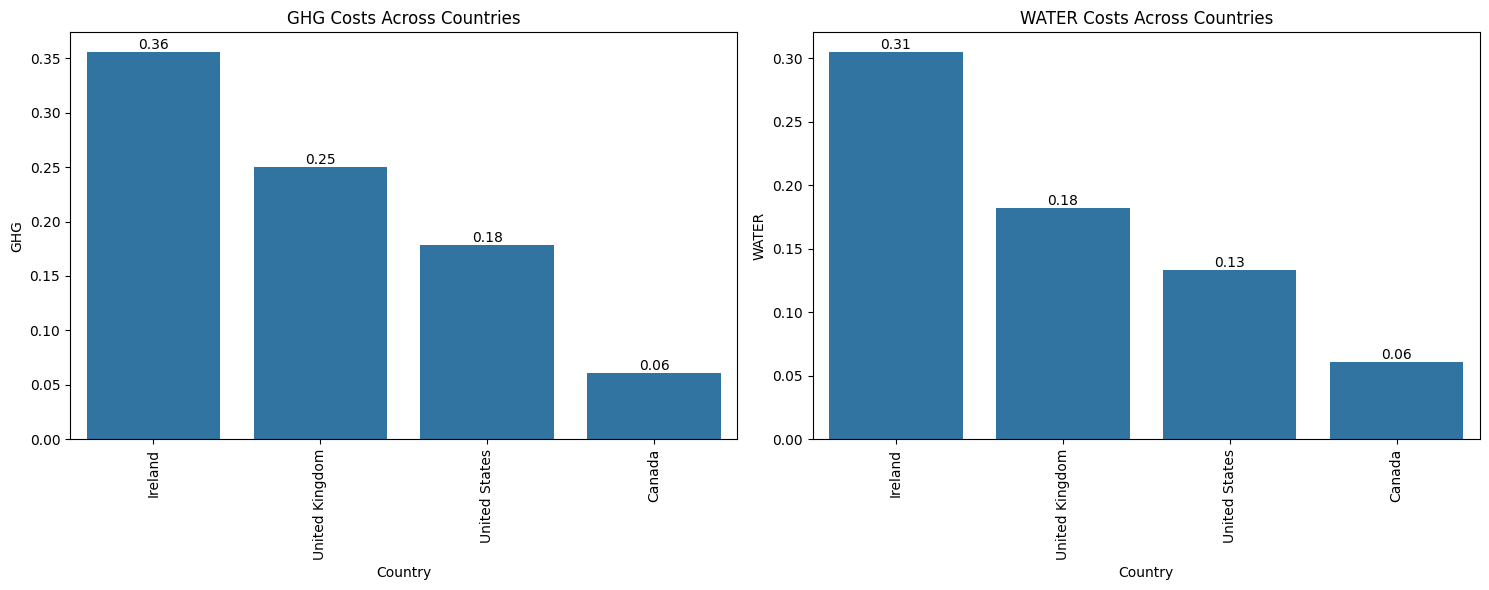

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot GHG costs across countries
sns.barplot(ax=axes[0], x='country', y='GHG', data=country_GHG)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Country')
axes[0].set_ylabel('GHG')
axes[0].set_title('GHG Costs Across Countries')

# Add annotations to the bars
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

# Plot WATER costs across countries
sns.barplot(ax=axes[1], x='country', y='WATER', data=country_WATER)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Country')
axes[1].set_ylabel('WATER')
axes[1].set_title('WATER Costs Across Countries')

# Add annotations to the bars
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

One potential explanation for Ireland's higher water and GHG costs compared to Canada could be the variation in industrial composition between the two countries. Ireland may host a larger proportion of industries that heavily rely on water and energy, such as manufacturing or agriculture. The substantial usage of these resources in such sectors could drive up water consumption and GHG emissions, thereby resulting in elevated costs. In contrast, Canada's industrial landscape might be more diverse, with a notable focus on resource extraction industries like mining and forestry. These sectors likely entail operations with lower water requirements or distinct emission patterns, leading to comparatively lower associated costs.

## Year Sector: Top and Bottom 1 in Water and GHG Costs

> Based on the industries and countries with the highest and lowest direct/indirect water and GHG costs, we created subplots to compare their differences and delve deeper into the underlying insights.

In [ ]:
plot3 = df_plot

In [ ]:
#filter industry by top and bottom 1 of ghg cost and water cost respectively
industry_GHG = plot3[(plot3['industry']=='Industrial Conglomerates') | (plot3['industry']=='Hotels, Restaurants and Leisure')]
industry_WATER = plot3[(plot3['industry']=='Industrial Conglomerates') | (plot3['industry']=='Commercial Services and Supplies')]

In [ ]:
#filter country by top and bottom 1 of ghg cost and water cost
country_GW = plot3[(plot3['country']=='Ireland') | (plot3['country']=='Canada')]
country_GW.head()

,period_end_date,reported_currency_iso_code,company_sector_revenue,sector_revenue_to_total_revenue,gv_key,company_name,company_type,industry,country,zip_code,...,year,npm,staff_sale,aftret_equity,rd_sale,dpr,ghg,water,GHG,WATER
1825,2011-12-31,USD,6778.61,60.056791,3221.0,Aon plc,Public Company,Insurance,Ireland,D01 K0Y8,...,2011,0.08575,0.582,0.11850,0.0,0.20475,17.462704,10.793121,False,False
1826,2011-12-31,USD,4508.39,39.943209,3221.0,Aon plc,Public Company,Insurance,Ireland,D01 K0Y8,...,2011,0.08575,0.582,0.11850,0.0,0.20475,17.462704,10.793121,False,False
1827,2010-12-31,USD,6406.44,75.263628,3221.0,Aon plc,Public Company,Insurance,Ireland,D01 K0Y8,...,2010,0.08475,0.599,0.12075,0.0,0.22700,12.934825,8.308632,False,False
1828,2010-12-31,USD,2105.56,24.736372,3221.0,Aon plc,Public Company,Insurance,Ireland,D01 K0Y8,...,2010,0.08475,0.599,0.12075,0.0,0.22700,12.934825,8.308632,False,False
1829,2009-12-31,USD,6324.15,83.267281,3221.0,Aon plc,Public Company,Insurance,Ireland,D01 K0Y8,...,2009,0.08100,0.605,0.11175,0.0,0.26575,12.092035,7.625919,False,False


In [ ]:
#group by industry and year to get mean of direct and indirect ghg cost
industry_GHG_gp = industry_GHG.groupby(['industry','year']).agg({ 'direct_ghg_cost': 'mean',
                                     'indirect_ghg_cost': 'mean'})
#reset industry index
industry_GHG_gp = industry_GHG_gp.reset_index(level = 'industry')
industry_GHG_gp.head()

,industry,direct_ghg_cost,indirect_ghg_cost
year,,,
2008,"Hotels, Restaurants and Leisure",4.928312,39.855641
2009,"Hotels, Restaurants and Leisure",4.577094,40.294428
2010,"Hotels, Restaurants and Leisure",6.075263,46.818685
2011,"Hotels, Restaurants and Leisure",5.756745,49.462667
2012,"Hotels, Restaurants and Leisure",6.009383,54.492501


In [ ]:
#group by industry and year to get mean of direct and indirect water cost
industry_WATER_gp = industry_WATER.groupby(['industry','year']).agg({ 'direct_water_cost': 'mean',
                                     'indirect_water_cost': 'mean'})
#reset industry index
industry_WATER_gp = industry_WATER_gp.reset_index(level = 'industry')
industry_WATER_gp.head()

,industry,direct_water_cost,indirect_water_cost
year,,,
2008,Commercial Services and Supplies,15.483075,10.823218
2009,Commercial Services and Supplies,10.869358,15.251528
2010,Commercial Services and Supplies,10.701361,26.704928
2011,Commercial Services and Supplies,6.456666,10.643020
2012,Commercial Services and Supplies,5.990189,10.094345


In [ ]:
#group by country and year to get mean of direct and indirect ghg cost
country_GHG = country_GW.groupby(['country','year']).agg({ 'direct_ghg_cost': 'mean',
                                     'indirect_ghg_cost': 'mean'})
#reset country index
country_GHG = country_GHG.reset_index(level = 'country')
country_GHG.head()

,country,direct_ghg_cost,indirect_ghg_cost
year,,,
2008,Canada,7.338875,4.008982
2009,Canada,8.629783,4.882771
2010,Canada,3.431377,2.921139
2011,Canada,4.914662,3.847606
2012,Canada,5.077942,6.142258


In [ ]:
#group by country and year to get mean of direct and indirect water cost
country_WATER= country_GW.groupby(['country','year']).agg({ 'direct_water_cost': 'mean',
                                     'indirect_water_cost': 'mean'})
#reset country index
country_WATER = country_WATER.reset_index(level = 'country')
country_WATER.head()

,country,direct_water_cost,indirect_water_cost
year,,,
2008,Canada,3.541805,4.758681
2009,Canada,4.167795,5.867278
2010,Canada,1.539706,3.228116
2011,Canada,2.256757,4.564471
2012,Canada,2.291624,6.146335


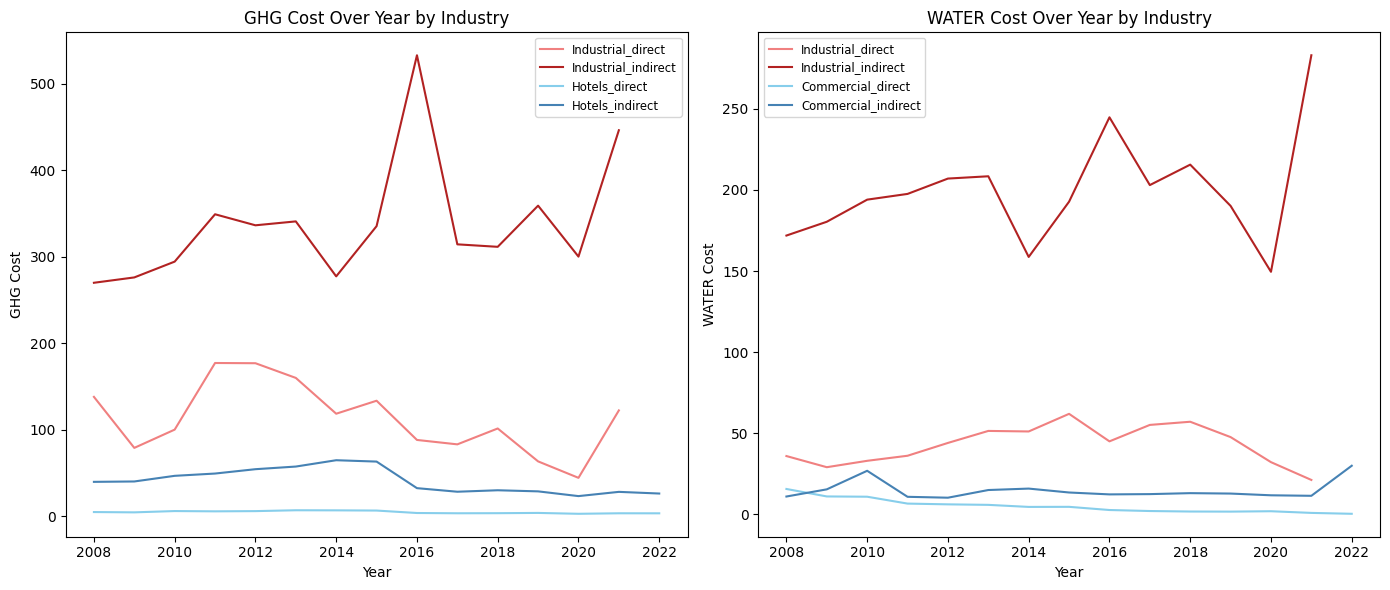

In [ ]:
import matplotlib.pyplot as plt

Industrial = industry_GHG_gp[industry_GHG_gp['industry'] == 'Industrial Conglomerates']
Hotels = industry_GHG_gp[industry_GHG_gp['industry'] == 'Hotels, Restaurants and Leisure']
Industrial_water = industry_WATER_gp[industry_WATER_gp['industry'] == 'Industrial Conglomerates']
Commercial = industry_WATER_gp[industry_WATER_gp['industry'] == 'Commercial Services and Supplies']

# Create a figure with horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot GHG Costs by industry
axes[0].plot(Industrial.index, Industrial["direct_ghg_cost"], label="Industrial_direct", color="lightcoral")
axes[0].plot(Industrial.index, Industrial["indirect_ghg_cost"], label="Industrial_indirect", color="firebrick")
axes[0].plot(Hotels.index, Hotels["direct_ghg_cost"], label="Hotels_direct", color="skyblue")
axes[0].plot(Hotels.index, Hotels["indirect_ghg_cost"], label="Hotels_indirect", color="steelblue")

axes[0].set_xlabel('Year')
axes[0].set_ylabel('GHG Cost')
axes[0].set_title('GHG Cost Over Year by Industry')
axes[0].legend(fontsize='small')

# Plot WATER Costs by industry
axes[1].plot(Industrial_water.index, Industrial_water["direct_water_cost"], label="Industrial_direct", color="lightcoral")
axes[1].plot(Industrial_water.index, Industrial_water["indirect_water_cost"], label="Industrial_indirect", color="firebrick")
axes[1].plot(Commercial.index, Commercial["direct_water_cost"], label="Commercial_direct", color="skyblue")
axes[1].plot(Commercial.index, Commercial["indirect_water_cost"], label="Commercial_indirect", color="steelblue")

axes[1].set_xlabel('Year')
axes[1].set_ylabel('WATER Cost')
axes[1].set_title('WATER Cost Over Year by Industry')
axes[1].legend(fontsize='small')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

From these two plots, it's evident that indirect GHG and water costs consistently surpass direct costs over the years, regardless of the industry. Particularly noteworthy is the observation that indirect water and GHG costs in industrial sectors are consistently the highest throughout the period. This trend suggests that companies may struggle to regulate the expenditures and GHG emissions of their upstream or downstream partners in the supply chain, leading to higher indirect costs compared to direct ones.


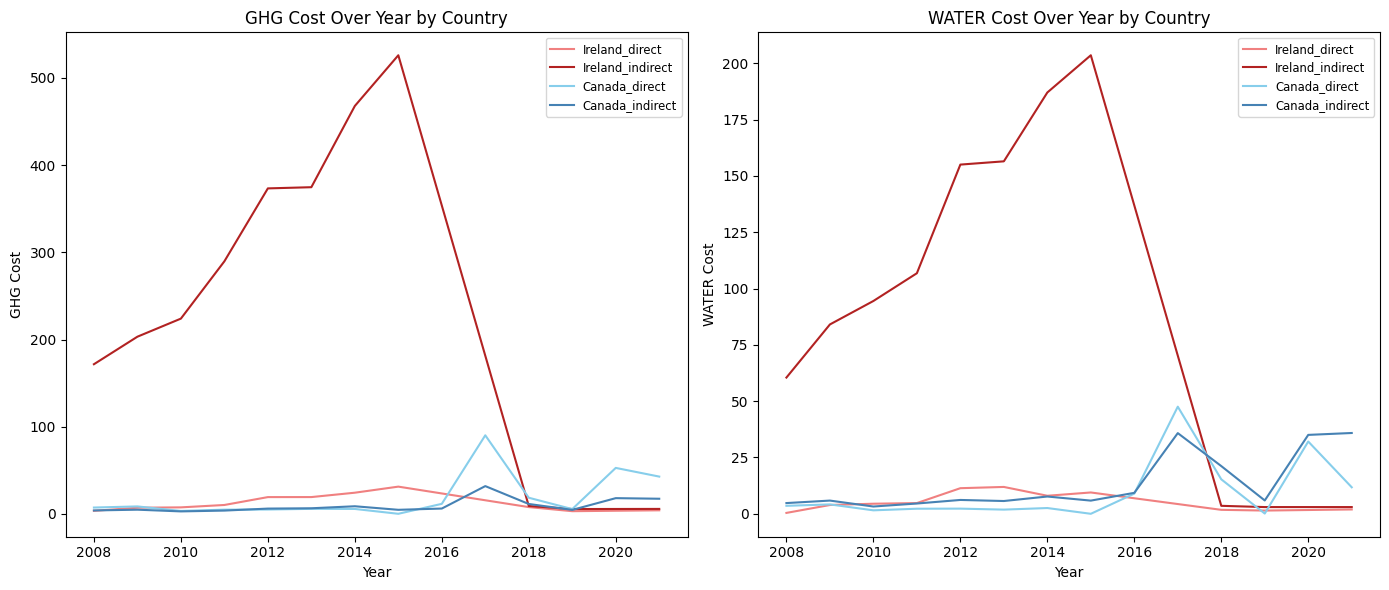

In [ ]:
import matplotlib.pyplot as plt

Ireland_G = country_GHG[country_GHG['country'] == 'Ireland']
Canada_G = country_GHG[country_GHG['country'] == 'Canada']
Ireland_W = country_WATER[country_WATER['country'] == 'Ireland']
Canada_W = country_WATER[country_WATER['country'] == 'Canada']

# Create a figure with horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot GHG Costs by country
axes[0].plot(Ireland_G.index, Ireland_G["direct_ghg_cost"], label="Ireland_direct", color="lightcoral")
axes[0].plot(Ireland_G.index, Ireland_G["indirect_ghg_cost"], label="Ireland_indirect", color="firebrick")
axes[0].plot(Canada_G.index, Canada_G["direct_ghg_cost"], label="Canada_direct", color="skyblue")
axes[0].plot(Canada_G.index, Canada_G["indirect_ghg_cost"], label="Canada_indirect", color="steelblue")

axes[0].set_xlabel('Year')
axes[0].set_ylabel('GHG Cost')
axes[0].set_title('GHG Cost Over Year by Country')
axes[0].legend(fontsize='small')

# Plot WATER Costs by country
axes[1].plot(Ireland_W.index, Ireland_W["direct_water_cost"], label="Ireland_direct", color="lightcoral")
axes[1].plot(Ireland_W.index, Ireland_W["indirect_water_cost"], label="Ireland_indirect", color="firebrick")
axes[1].plot(Canada_W.index, Canada_W["direct_water_cost"], label="Canada_direct", color="skyblue")
axes[1].plot(Canada_W.index, Canada_W["indirect_water_cost"], label="Canada_indirect", color="steelblue")

axes[1].set_xlabel('Year')
axes[1].set_ylabel('WATER Cost')
axes[1].set_title('WATER Cost Over Year by Country')
axes[1].legend(fontsize='small')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

Based on these two plots, it's evident that indirect GHG and water costs in Ireland were significantly higher compared to direct ones, as well as those of Canada, over the span of 10 years. However, in 2018, there was a notable decrease in these costs, with the values dropping even lower than the direct and indirect water and GHG costs in Canada.

One potential reason for this trend could be attributed to the environmental policies and initiatives implemented by the European Union (EU), of which Ireland is a member state. Under the Paris Agreement, which the EU committed to in 2015, member states pledged to cut greenhouse gas emissions by at least 40% below 1990 levels by 2030. Another reason of the decrease is due to a significant drop in power generation emissions (13.9 per cent decrease) as a result of ESB Moneypoint coal-fired plant being off-line for the last three months of 2018 and, in addition, the strong presence of renewable energy, mainly wind generation.

# Regression

In the regression analysis, we'll initially combine related variables (direct cost + indirect cost) to assess the impact of each ESG indicator on the target variable. Subsequently, for the indicators showing significant influence, we'll further dissect whether they contribute to direct or indirect costs.

## Original Variables

In [ ]:
# One-hot encoding
org_df = df
org_df_cat = org_df[['company_type', 'industry', 'country']]
#org_df_cat_dum = pd.get_dummies(org_df_cat, columns=['company_type', 'industry', 'country'], drop_first=True)
#org_df_encoded = pd.get_dummies(org_df, columns=[ 'company_type', 'industry', 'country'], drop_first=True)
#org_df_encoded = org_df_encoded.drop(['zip_code', 'company_name','period_end_date', 'gv_key','reported_currency_iso_code'], axis = 1)
org_df_encoded = org_df.drop(['zip_code', 'company_name','period_end_date', 'gv_key','reported_currency_iso_code'], axis = 1)

In [ ]:
# Normalization
predictors = ['inv_turn', 'at_turn', 'npm', 'adv_sale', 'rd_sale'] #Inventory turnover, Assets turnover, Net Profit Margin, Advertising Expenses / Sales, Research and Development / Sales
org_df_encoded[predictors] = StandardScaler().fit_transform(org_df_encoded[predictors])

In [ ]:
# Drop target variables
org_df_encoded_without_target = org_df_encoded.drop(predictors, axis = 1)

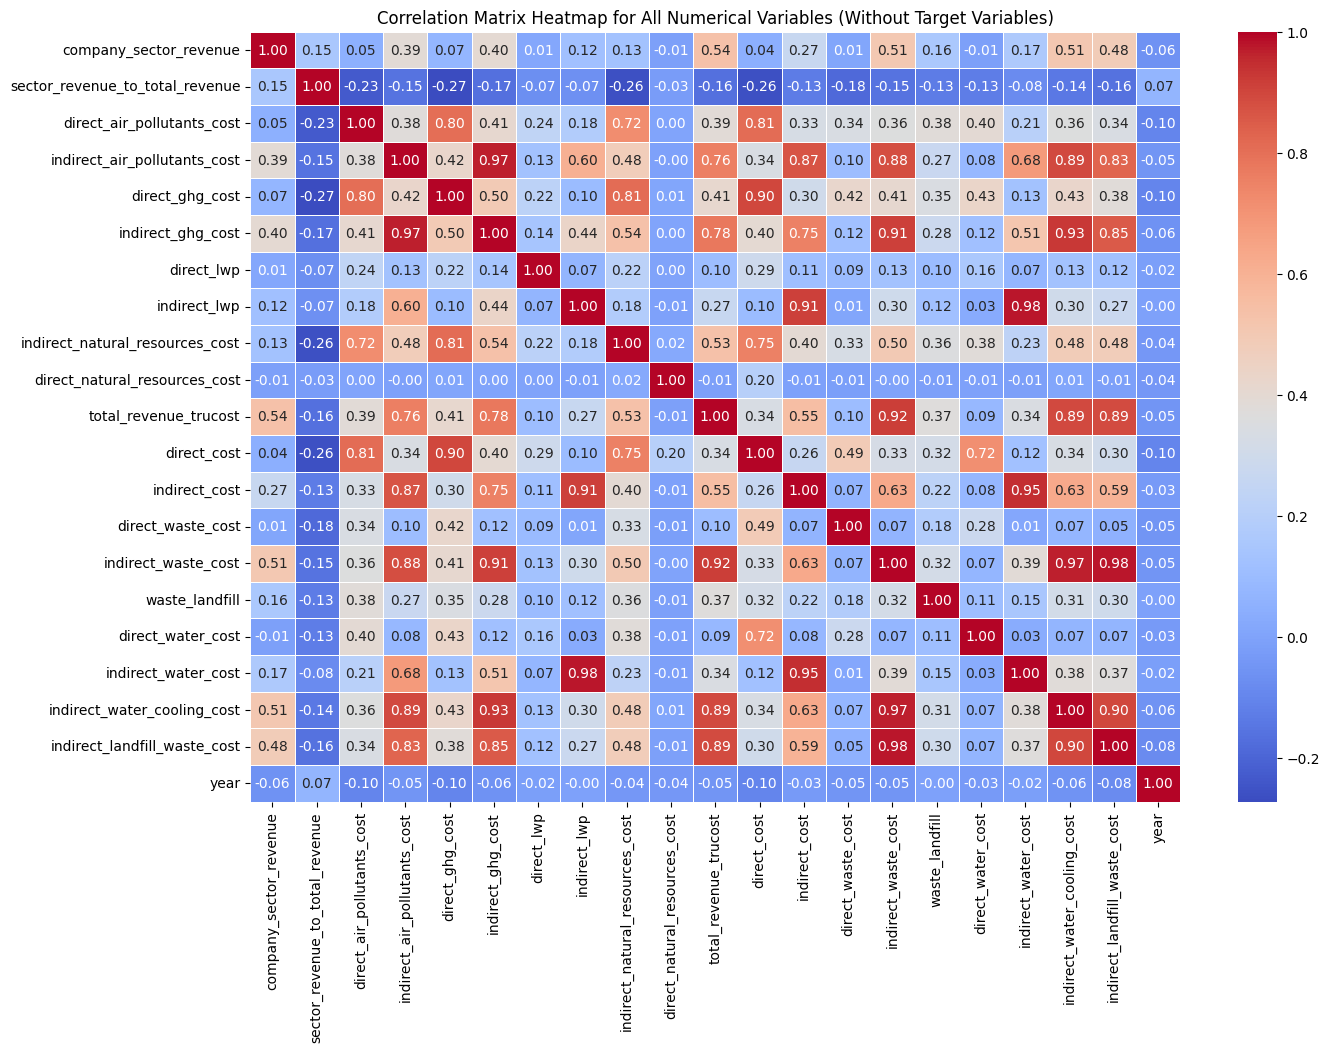

In [ ]:
# Correlation matrix for numerical columns
numerical_columns = org_df_encoded_without_target.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap for All Numerical Variables (Without Target Variables)')
plt.show()

In [ ]:
org_X = add_constant(org_df_encoded_without_target.select_dtypes(include=[np.number]))  # Numeric columns
org_X_scaled = pd.DataFrame(StandardScaler().fit_transform(org_X), columns = org_X.columns)

In [ ]:
org_result_num = org_X_scaled.copy()
#org_result_num = pd.concat([org_result_num, org_df_cat_dum], axis=1)
org_result_num['inv_turn'] = org_df['inv_turn']

## Combine Variables

In [ ]:
# Combine direct and indirect costs for the variables
combined_costs_df = df.copy()

cost_pairs = [('ghg_cost', 'direct_ghg_cost', 'indirect_ghg_cost'), ('lwp', 'direct_lwp', 'indirect_lwp'),
              ('natural_resources_cost', 'direct_natural_resources_cost', 'indirect_natural_resources_cost'),
              ('waste_cost', 'direct_waste_cost', 'indirect_waste_cost'), ('water_cost', 'direct_water_cost', 'indirect_water_cost')]

for cost_pair in cost_pairs:
    combined_column_name = cost_pair[0]
    direct_column_name = cost_pair[1]
    indirect_column_name = cost_pair[2]

    if direct_column_name in combined_costs_df.columns and indirect_column_name in combined_costs_df.columns:
        combined_costs_df[combined_column_name] = combined_costs_df[direct_column_name] + combined_costs_df[indirect_column_name]

# Select combined costs
combined_costs_df = combined_costs_df[['period_end_date', 'reported_currency_iso_code', 'company_sector_revenue',
                                       'sector_revenue_to_total_revenue', 'gv_key', 'company_name', 'company_type',
                                       'industry', 'country', 'zip_code', 'total_revenue_trucost', 'year',
                                       'npm', 'at_turn', 'adv_sale', 'rd_sale', 'inv_turn'] +
                                       [cost_pair[0] for cost_pair in cost_pairs]]

combined_costs_df.head()

,period_end_date,reported_currency_iso_code,company_sector_revenue,sector_revenue_to_total_revenue,gv_key,company_name,company_type,industry,country,zip_code,...,npm,at_turn,adv_sale,rd_sale,inv_turn,ghg_cost,lwp,natural_resources_cost,waste_cost,water_cost
0,2018-12-31,USD,93.624,5.749062,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.2325,0.05375,0.017,0.0,1.8860,1.865384,0.247564,0.168928,0.200212,1.317161
1,2018-12-31,USD,1155.487,70.953676,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.2325,0.05375,0.017,0.0,1.8860,1.865384,0.247564,0.168928,0.200212,1.317161
2,2018-12-31,USD,379.398,23.297261,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.2325,0.05375,0.017,0.0,1.8860,1.865384,0.247564,0.168928,0.200212,1.317161
3,2017-12-31,USD,345.086,22.417556,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.2150,0.05200,0.017,0.0,0.6615,1.788829,0.218809,0.155135,0.192487,1.211866
4,2017-12-31,USD,110.938,7.206780,24447.0,BOK Financial Corporation,Public Company,Banks,United States,74172,...,0.2150,0.05200,0.017,0.0,0.6615,1.788829,0.218809,0.155135,0.192487,1.211866


In [ ]:
df = combined_costs_df

In [ ]:
# One-hot encoding
df_cat = df[['company_type', 'industry', 'country']]
df_cat_dum = pd.get_dummies(df_cat, columns=['company_type', 'industry', 'country'], drop_first=True)
df_encoded = pd.get_dummies(df, columns=[ 'company_type', 'industry', 'country'], drop_first=True)
df_encoded = df_encoded.drop(['zip_code', 'company_name','period_end_date', 'gv_key','reported_currency_iso_code'], axis = 1)

In [ ]:
# Normalization
predictors = ['inv_turn', 'at_turn', 'npm', 'adv_sale', 'rd_sale'] #Inventory turnover, Assets turnover, Net Profit Margin, Advertising Expenses / Sales, Research and Development / Sales
df_encoded[predictors] = StandardScaler().fit_transform(df_encoded[predictors])

In [ ]:
# Drop target variables
df_encoded_without_target = df_encoded.drop(predictors, axis = 1)

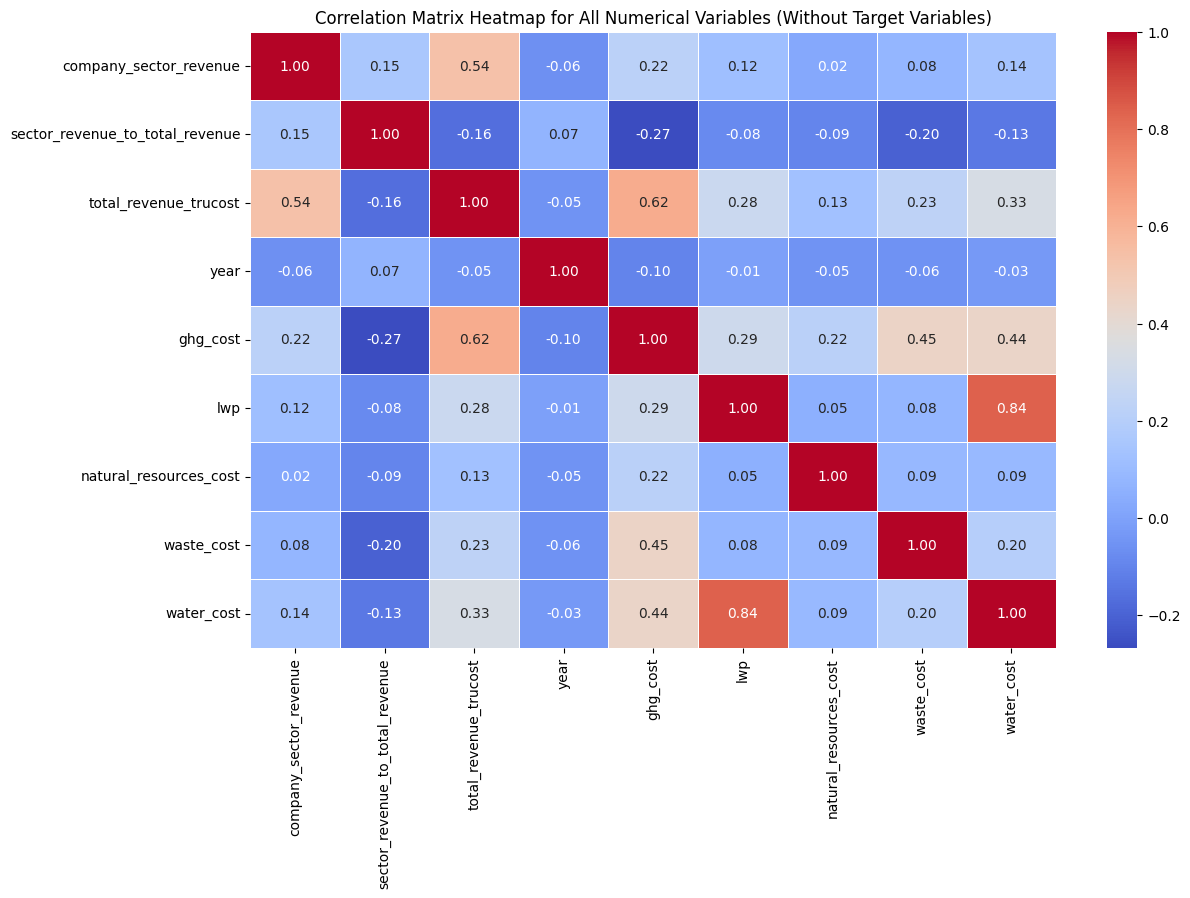

In [ ]:
# Correlation matrix for numerical columns
numerical_columns = df_encoded_without_target.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(13,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap for All Numerical Variables (Without Target Variables)')
plt.show()

### Multicollinearity Check - Variance Inflation Factor (VIF)

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to determine their individual effects on the dependent variable. In our analysis, we assessed multicollinearity using the Variance Inflation Factor (VIF), which measures how much the variance of an estimated regression coefficient increases if the predictors are correlated.

In [ ]:
# Multicollinearity check
X = df_encoded_without_target.select_dtypes(include=[np.number])  # Numeric columns
print(f'There are {X.columns.nunique()} variables in total. \n\n')

# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["Feature"] = X.columns
print(vif_data.sort_values('VIF', ascending=False))

# Select the variables with the VIF < 10 for the regression
low_vif_features = vif_data[vif_data["VIF"] <= 10]["Feature"]
print(f'\n\nAll low VIF features:\n {low_vif_features}')

There are 9 variables in total. 


        VIF                          Feature
8  4.111381                       water_cost
5  3.575923                              lwp
3  3.330575                             year
1  3.059911  sector_revenue_to_total_revenue
2  2.644936            total_revenue_trucost
4  2.606618                         ghg_cost
0  1.680420           company_sector_revenue
7  1.367708                       waste_cost
6  1.078568           natural_resources_cost


All low VIF features:
 0             company_sector_revenue
1    sector_revenue_to_total_revenue
2              total_revenue_trucost
3                               year
4                           ghg_cost
5                                lwp
6             natural_resources_cost
7                         waste_cost
8                         water_cost
Name: Feature, dtype: object


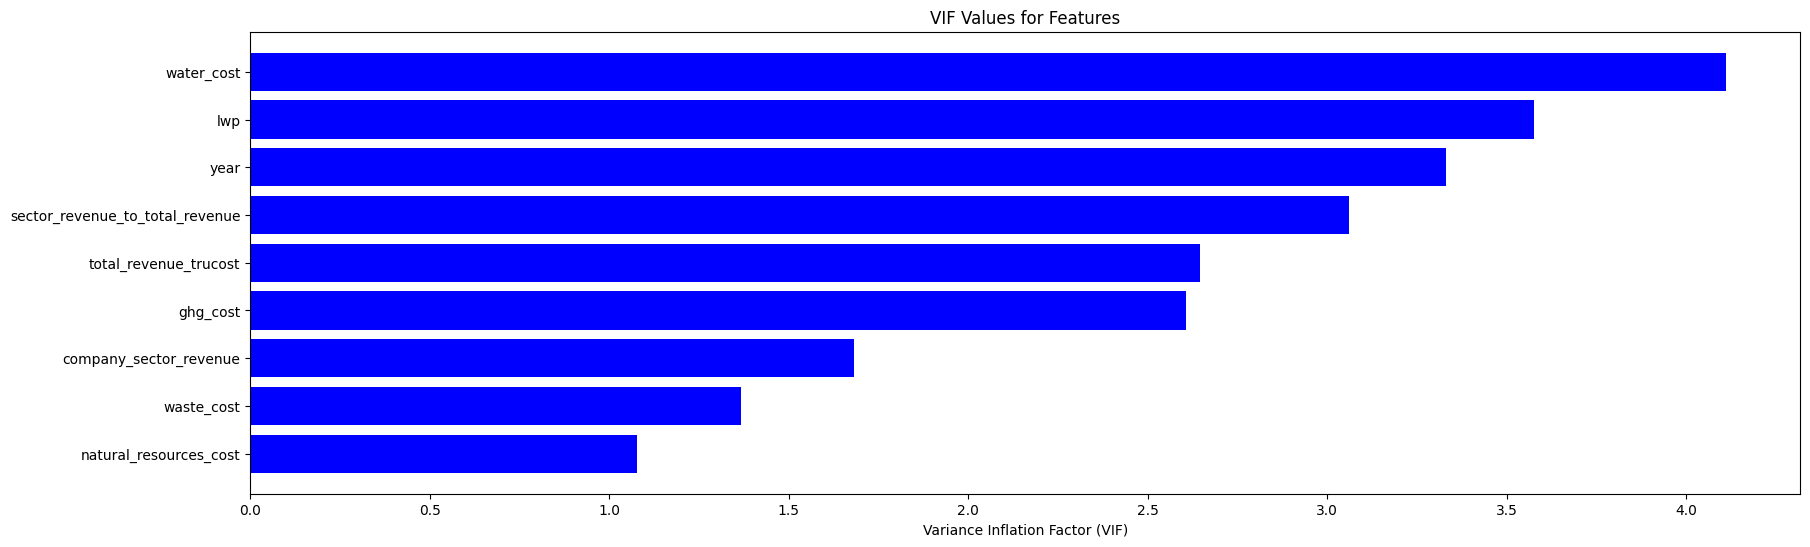

In [ ]:
# Plot the VIF for all the features
vif_data_sorted = vif_data.sort_values('VIF', ascending=False)

plt.figure(figsize=(20, 6))
plt.barh(vif_data_sorted["Feature"], vif_data_sorted["VIF"], color='b')
plt.xlabel('Variance Inflation Factor (VIF)')
plt.title('VIF Values for Features')
plt.gca().invert_yaxis()
plt.show()

From the result shown above, we can see that all multicollinearity checks for the combined variables yielded values below 10. Hence, we can confidently proceed with the utilization of all combined variables.

## Linear Regression

In [ ]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)
result_num = X_scaled.copy()
result_num['year'] = df['year']
result_num = pd.concat([result_num, df_cat], axis=1)
result_num['country'] = result_num['country'].astype('category')
result_num['year'] = result_num['year'].astype('category')

### Sales/Demand

For the Sales/Demand aspect, we've chosen two correlated financial metrics, inventory turnover (inv_turn), and asset turnover (at_turn), as key indicators.

#### Inventory Turnover

In [ ]:
# Regression for inv_turn
result_inv = result_num.copy()
result_inv['inv_turn'] = df['inv_turn']

model =  feols('inv_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_inv).vcov("hetero")
model1= feols("inv_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country" , data=result_inv).vcov("hetero")
model2 =  feols('inv_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country+year' , data=result_inv).vcov("hetero")
#inv_turn_model = smf.ols(formula='inv_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_num).fit()

#Stargazer([inv_turn_model])
display(etable([model, model1, model2]))

                                     est1               est2               est3
----------------------  -----------------  -----------------  -----------------
depvar                           inv_turn           inv_turn           inv_turn
-------------------------------------------------------------------------------
Intercept               34.164*** (4.475)
ghg_cost                -5.278*** (1.202)  -5.300*** (1.209)  -4.778*** (1.125)
natural_resources_cost  -1.946*** (0.385)  -1.965*** (0.389)  -1.938*** (0.476)
waste_cost              -2.499*** (0.463)  -2.520*** (0.468)  -2.324*** (0.365)
water_cost              -2.410*** (0.380)  -2.420*** (0.382)  -3.005*** (0.692)
lwp                         0.298 (0.248)      0.298 (0.249)      0.721 (0.497)
-------------------------------------------------------------------------------
year                                    -                  -                  x
country                                 -                  x                  

None

We constructed three models: one including all combined variables (est1), another excluding the fixed country variable (est2), and a third incorporating both fixed country and year variables (est3). Fixing the country variable in Model 1 isolates other variables' impact on inventory turnover within each country, while Model 2 captures temporal variations with the inclusion of the year variable. Notably, the coefficient for 'lwp' becomes statistically significant when both country and year variables are fixed, increasing from 0.298 to 0.721. However, the overall explanatory power remains low across all models, with unchanged R-squared values (0.000), indicating the presence of other unaccounted factors influencing inventory turnover.

The above result might shows that the more the pollution that the company made on the environment, implying higher costs, will also lead to lower in inventory turnover.

#### Asset Turnover

In [ ]:
# Regression for at_turn
result_at = result_num.copy()
result_at['at_turn'] = df['at_turn']

model =  feols('at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_at).vcov("hetero")
model1= feols("at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | industry" , data=result_at).vcov("hetero")
model2 =  feols('at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country+year' , data=result_at).vcov("hetero")
#at_turn_model = smf.ols(formula='at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_num).fit()

display(etable([model, model1, model2] ))
#Stargazer([inv_turn_model]),

                                     est1               est2               est3
----------------------  -----------------  -----------------  -----------------
depvar                            at_turn            at_turn            at_turn
-------------------------------------------------------------------------------
Intercept                0.761*** (0.004)
ghg_cost                -0.050*** (0.004)   0.021*** (0.003)  -0.051*** (0.004)
natural_resources_cost  -0.015*** (0.002)  -0.010*** (0.002)  -0.016*** (0.002)
waste_cost              -0.053*** (0.002)  -0.005*** (0.001)  -0.053*** (0.002)
water_cost                 -0.009 (0.006)     -0.007 (0.004)     -0.010 (0.006)
lwp                      0.066*** (0.007)   0.026*** (0.005)   0.066*** (0.007)
-------------------------------------------------------------------------------
country                                 -                  -                  x
year                                    -                  -                  

None

In Model 1 and Model 2, 'water_cost' shows statistically insignificant coefficients (p > 0.05), indicating that it does not have a significant impact on asset turnover. However, when both country and year variables are fixed in Model 3, 'water_cost' remains statistically insignificant, suggesting its limited explanatory power in predicting asset turnover. Despite this, the overall explanatory power slightly improves in Model 3, with an increased R-squared value of 0.032, indicating that incorporating both country and year variables enhances the model's ability to explain variability in asset turnover.

The above result might shows that the more the pollution that the company made on the environment, implying higher costs, will also lead to lower in assets turnover. This means that the sales or demand of the company will also be negatively affected, as they are not able to generate more value from their assets. Possible reason behind might be for the assets turnover, lower assets turnover means less effective assets in generating sales, the ineffective assets might be machine in old model which usually generate more pollution and hence increasing the pollution cost. Hence when compare with new and cleaner machine, they might give more pollution while functioning less efficiently hence leading to lower assets turnover and ultimately negatively affecting sales.

The positive significant value for lwp might means that if the company have put more care on their workers, it might tend to increase the productivity of the workers, hence better utilize the machine or assets in generating more sales and profit.

#### Combine Inventory Turnover and Asset Turnover

In [ ]:
# Sales/Demand
# Composite variable
result_sales = result_num.copy()
result_sales['at_turn'] = df['at_turn']
result_sales['inv_turn'] = df['inv_turn']
result_sales['sales_demand'] = (result_sales['inv_turn'] + result_sales['at_turn']) / 2

model =  feols('sales_demand ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_sales).vcov("hetero")
model1= feols("sales_demand ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | industry" , data=result_sales).vcov("hetero")
model2 =  feols('sales_demand ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | industry+year' , data=result_sales).vcov("hetero")
#at_turn_model = smf.ols(formula='at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_num).fit()

display(etable([model, model1, model2] ))
#Stargazer([inv_turn_model]),

                                     est1               est2               est3
----------------------  -----------------  -----------------  -----------------
depvar                       sales_demand       sales_demand       sales_demand
-------------------------------------------------------------------------------
Intercept               17.462*** (2.238)
ghg_cost                -2.664*** (0.601)  -3.475*** (0.657)  -3.292*** (0.651)
natural_resources_cost  -0.981*** (0.192)  -1.096*** (0.140)  -1.148*** (0.162)
waste_cost              -1.276*** (0.232)     -0.127 (0.072)     -0.069 (0.091)
water_cost              -1.209*** (0.191)      0.091 (0.128)     -0.294 (0.271)
lwp                         0.182 (0.124)      0.083 (0.090)      0.423 (0.241)
-------------------------------------------------------------------------------
year                                    -                  -                  x
industry                                -                  x                  

None

The analysis focuses on Sales/Demand, utilizing the composite variable 'sales_demand' derived from inventory turnover ('inv_turn') and asset turnover ('at_turn'). Three models were builded.

Across all models, 'ghg_cost', 'natural_resources_cost', 'waste_cost', and 'water_cost' show statistically significant effects (p < 0.05) on 'sales_demand'. However, 'lwp' remains statistically insignificant (p > 0.05) in all models, suggesting it does not significantly influence sales demand.

The R-squared values for all models are low (0.000), indicating that the included variables collectively explain only a limited portion of the variability in 'sales_demand'. Additionally, incorporating both country and year variables in Model 3 does not substantially improve the model's explanatory power.

As the two ratio is combined and inventory turnover tend to have larger impact over assets turnover, the effect of the x variable on inventory turnover tend to mask the effect of x variable on assets turnover. Hence, we would conclude that the more green house gases and natural resources cost it is that a company has made, it might negatively harm the company sales.

#### Breakdown The Significant Varaibles

In [ ]:
# Sales/Demand
# Composite variable
org_df_encoded['sales_demand'] = (org_df_encoded['inv_turn'] + org_df_encoded['at_turn']) / 2
org_result_sales = org_result_num.copy()
org_result_num = pd.concat([org_result_num, org_df_cat], axis=1)

# org_result_num['at_turn'] = org_df['at_turn']
# org_result_num['year'] = org_result_num['year'].astype('category')
# org_result_num['country'] = org_result_num['country'].astype('category')

org_result_sales['at_turn'] = org_df['at_turn']
org_result_sales['inv_turn'] = org_df['inv_turn']
org_result_sales['sales_demand'] = (org_result_sales['inv_turn'] + org_result_sales['at_turn']) / 2
org_model =  feols('sales_demand ~ direct_ghg_cost + indirect_ghg_cost + direct_natural_resources_cost +  indirect_natural_resources_cost + direct_waste_cost + indirect_waste_cost + direct_water_cost + indirect_water_cost' , data=org_result_sales).vcov("hetero")
#org_model1= feols("sales_demand ~ direct_air_pollutants_cost + indirect_ghg_cost + direct_lwp + indirect_lwp + indirect_natural_resources_cost + direct_natural_resources_cost + direct_waste_cost + waste_landfill + direct_water_cost| country" , data=org_result_sales).vcov("hetero")
#org_model2 =  feols('sales_demand ~ direct_air_pollutants_cost + indirect_ghg_cost + direct_lwp + indirect_lwp + indirect_natural_resources_cost + direct_natural_resources_cost + direct_waste_cost + waste_landfill + direct_water_cost| country+year' , data=org_result_sales).vcov("hetero")
#at_turn_model = smf.ols(formula='at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_num).fit()
#display(etable([org_model, org_model1, org_model2] ))
display(etable(org_model))

                                              est1
-------------------------------  -----------------
depvar                                sales_demand
--------------------------------------------------
Intercept                        17.462*** (2.238)
direct_ghg_cost                  -1.178*** (0.339)
indirect_ghg_cost                   -0.935 (1.896)
direct_natural_resources_cost    -0.863*** (0.178)
indirect_natural_resources_cost  -1.133*** (0.235)
direct_waste_cost                -1.321*** (0.248)
indirect_waste_cost                 -0.472 (2.107)
direct_water_cost                -0.337*** (0.076)
indirect_water_cost              -0.870*** (0.238)
--------------------------------------------------
--------------------------------------------------
R2                                           0.000
S.E. type                                   hetero
Observations                                 33702
--------------------------------------------------
Significance levels: * p < 0.05

None

If we break down the pollution cost into indirect and direct cost in different aspect. We can see that usually the direct pollution cost from the bussiness activities of the company itself will have negative effect on the company's financial ratio and hence possibly negatively affecting the sales of the company. While the indirect cost, which might came from the company's supplier such as waste and GHG cost would not hve effect on the company's financial ratio such as inventory turnover and assets turnover.

### Pricing

#### Net Profit Margin

In [ ]:
# Regression for npm
result_npm = result_num.copy()
result_npm['npm'] = df['npm']

model =  feols('npm ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_npm).vcov("hetero")
model1= feols("npm ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | industry" , data=result_npm).vcov("hetero")
model2 =  feols('npm ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country+year' , data=result_npm).vcov("hetero")
#at_turn_model = smf.ols(formula='at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_num).fit()

#Stargazer([inv_turn_model]),
display(etable([model, model1, model2] ))

                                    est1            est2           est3
----------------------  ----------------  --------------  -------------
depvar                               npm             npm            npm
-----------------------------------------------------------------------
Intercept               -11.938 (11.583)
ghg_cost                   3.292 (3.173)   1.472 (1.382)  2.215 (2.129)
natural_resources_cost     1.008 (0.979)   0.067 (0.055)  0.524 (0.520)
waste_cost                 1.330 (1.281)   0.326 (0.313)  1.020 (0.987)
water_cost                 0.940 (0.914)  -0.121 (0.129)  0.742 (0.824)
lwp                       -0.151 (0.184)   0.021 (0.039)  0.258 (0.481)
-----------------------------------------------------------------------
country                                -               -              x
year                                   -               -              x
industry                               -               x              -
-----------------------

None

When running the pollution cost against net profit margin, no significant result is observed.

#### Advertising Expenses/Sales

In [ ]:
# Regression for adv_sale
result_adv_sale = result_num.copy()
result_adv_sale['adv_sale'] = df['adv_sale']

model =  feols('adv_sale ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_adv_sale).vcov("hetero")
model1= feols("adv_sale ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country" , data=result_adv_sale).vcov("hetero")
model2 =  feols('adv_sale ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country+year' , data=result_adv_sale).vcov("hetero")
#at_turn_model = smf.ols(formula='at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_num).fit()

display(etable([model, model1, model2] ))
#Stargazer([inv_turn_model]),

                                     est1               est2               est3
----------------------  -----------------  -----------------  -----------------
depvar                           adv_sale           adv_sale           adv_sale
-------------------------------------------------------------------------------
Intercept                0.011*** (0.000)
ghg_cost                -0.003*** (0.000)  -0.003*** (0.000)  -0.003*** (0.000)
natural_resources_cost  -0.001*** (0.000)  -0.001*** (0.000)  -0.001*** (0.000)
waste_cost              -0.001*** (0.000)  -0.001*** (0.000)  -0.001*** (0.000)
water_cost               0.001*** (0.000)   0.001*** (0.000)   0.001*** (0.000)
lwp                        -0.000 (0.000)     -0.000 (0.000)     -0.000 (0.000)
-------------------------------------------------------------------------------
year                                    -                  -                  x
country                                 -                  x                  

None


The regression analysis investigates the relationship between the dependent variable adv_sale and various independent variables, including ghg_cost, natural_resources_cost, waste_cost, water_cost, and lwp, while controlling for year and country. The estimated coefficients indicate the expected change in adv_sale for a one-unit change in each independent variable, accounting for other variables in the model. Notably, ghg_cost, natural_resources_cost, waste_cost, and water_cost show statistically significant negative associations with adv_sale, suggesting that higher costs in these areas are linked to decreased advertising sales. However, lwp does not appear to have a significant impact on adv_sale.

#### Combine Net Profit Margin and Advertising Expenses/Sales

In [ ]:
# Pricing
# Composite variable
result_p = result_num.copy()
result_p['adv_sale'] = df['adv_sale']
result_p['npm'] = df['npm']
result_p['pricing'] = (result_p['npm'] + result_p['adv_sale']) / 2

model =  feols('pricing ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_p).vcov("hetero")
model1= feols("pricing ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country" , data=result_p).vcov("hetero")
model2 =  feols('pricing ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country+year' , data=result_p).vcov("hetero")
#at_turn_model = smf.ols(formula='at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_num).fit()

display(etable([model, model1, model2] ))
#Stargazer([inv_turn_model]),

                                  est1            est2           est3
----------------------  --------------  --------------  -------------
depvar                         pricing         pricing        pricing
---------------------------------------------------------------------
Intercept               -5.963 (5.791)
ghg_cost                 1.645 (1.587)   1.654 (1.596)  1.106 (1.064)
natural_resources_cost   0.503 (0.489)   0.509 (0.495)  0.262 (0.260)
waste_cost               0.664 (0.641)   0.671 (0.647)  0.510 (0.494)
water_cost               0.471 (0.457)   0.474 (0.460)  0.371 (0.412)
lwp                     -0.075 (0.092)  -0.075 (0.092)  0.129 (0.241)
---------------------------------------------------------------------
year                                 -               -              x
country                              -               x              x
---------------------------------------------------------------------
R2                               0.000           0.

None

The analysis examines Pricing, utilizing the composite variable 'pricing' derived from advertising sales ('adv_sale') and net profit margin ('npm'). Across all models, none of the variables exhibit statistically significant effects on 'pricing'.

The low R-squared values (0.000) across all models suggest that the included variables collectively explain only a limited portion of the variability in 'pricing'. Additionally, incorporating both country and year variables in Model 3 does not substantially enhance the model's explanatory power.

#### Breakdown The Significant Varaibles - Advertising Expenses/Sales

In [ ]:
# # Pricing
org_result_p = org_result_num.copy()
org_result_p['adv_sale'] = org_df['adv_sale']
org_result_p['npm'] = org_df['npm']
org_result_p['pricing'] = (org_result_p['npm'] + org_result_p['adv_sale']) / 2
org_model =  feols('pricing ~ direct_ghg_cost + indirect_ghg_cost + direct_natural_resources_cost +  indirect_natural_resources_cost + direct_waste_cost + indirect_waste_cost + direct_water_cost + indirect_water_cost' , data=org_result_p).vcov("hetero")
#org_model1= feols("pricing ~ direct_air_pollutants_cost + indirect_ghg_cost + direct_lwp + indirect_lwp + indirect_natural_resources_cost + direct_natural_resources_cost + direct_waste_cost + waste_landfill + direct_water_cost | country" , data=org_result_p).vcov("hetero")
#org_model2 =  feols('pricing ~ direct_air_pollutants_cost + indirect_ghg_cost + direct_lwp + indirect_lwp + indirect_natural_resources_cost + direct_natural_resources_cost + direct_waste_cost + waste_landfill + direct_water_cost | country+year' , data=org_result_p).vcov("hetero")
#at_turn_model = smf.ols(formula='at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_num).fit()
# display(etable([org_model, org_model1, org_model2] ))
display(etable(org_model))

                                           est1
-------------------------------  --------------
depvar                                  pricing
-----------------------------------------------
Intercept                        -5.963 (5.792)
direct_ghg_cost                   0.943 (0.909)
indirect_ghg_cost                -1.362 (1.314)
direct_natural_resources_cost     0.480 (0.467)
indirect_natural_resources_cost   0.183 (0.188)
direct_waste_cost                 0.739 (0.712)
indirect_waste_cost               2.627 (2.530)
direct_water_cost                 0.153 (0.150)
indirect_water_cost               0.529 (0.511)
-----------------------------------------------
-----------------------------------------------
R2                                        0.000
S.E. type                                hetero
Observations                              33702
-----------------------------------------------
Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001
Format of coefficient cell:


None

As shown in the performance of the models above, even when broken down into all direct and indirect costs, none of the variables appear to be particularly significant.

### Innovation

In [ ]:
# Regression for rd_sale
result_in = result_num.copy()
result_in['rd_sale'] = df['rd_sale']

model =  feols('rd_sale ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_in).vcov("hetero")
model1= feols("rd_sale ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country" , data=result_in).vcov("hetero")
model2 =  feols('rd_sale ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp | country+year' , data=result_in).vcov("hetero")
#at_turn_model = smf.ols(formula='at_turn ~ ghg_cost+natural_resources_cost+waste_cost+water_cost+lwp' , data=result_num).fit()

display(etable([model, model1, model2] ))
#Stargazer([inv_turn_model]),

                                  est1            est2            est3
----------------------  --------------  --------------  --------------
depvar                         rd_sale         rd_sale         rd_sale
----------------------------------------------------------------------
Intercept                5.323 (5.115)
ghg_cost                -1.455 (1.401)  -1.464 (1.410)  -0.980 (0.940)
natural_resources_cost  -0.449 (0.432)  -0.454 (0.437)  -0.236 (0.229)
waste_cost              -0.588 (0.566)  -0.594 (0.572)  -0.451 (0.436)
water_cost              -0.416 (0.404)  -0.419 (0.406)  -0.328 (0.364)
lwp                      0.066 (0.081)   0.066 (0.081)  -0.114 (0.212)
----------------------------------------------------------------------
year                                 -               -               x
country                              -               x               x
----------------------------------------------------------------------
R2                               0.000

None

The analysis focuses on the regression for 'rd_sale', with three models developed. Across all models, none of the variables show statistically significant effects on 'rd_sale', including 'ghg_cost', 'natural_resources_cost', 'waste_cost', 'water_cost', and 'lwp' (p > 0.05). The low R-squared values (0.000) across all models suggest that the included variables collectively explain only a limited portion of the variability in 'rd_sale'. Additionally, incorporating both country and year variables in Model 3 does not substantially enhance the model's explanatory power.

### Total Revenue

Finally, we investigate the impact of three indicators (Sales/Demand, Pricing, Innovation) on total revenue.

In [ ]:
result_all = result_num.copy()
result_all = pd.concat([result_all, df_encoded[predictors]], axis = 1)
all_model =  feols('total_revenue_trucost ~ inv_turn + at_turn + npm + adv_sale + rd_sale' , data=result_all).vcov("hetero")
display(etable(all_model))

                               est1
------------  ---------------------
depvar        total_revenue_trucost
-----------------------------------
Intercept             0.000 (0.005)
inv_turn             -0.000 (0.004)
at_turn            0.079*** (0.008)
npm                   0.210 (0.533)
adv_sale            -0.011* (0.005)
rd_sale               0.214 (0.533)
-----------------------------------
-----------------------------------
R2                            0.006
S.E. type                    hetero
Observations                  33702
-----------------------------------
Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001
Format of coefficient cell:
Coefficient (Std. Error)


None

In the final regression analysis, the relationship between 'total_revenue_trucost' and independent variables like 'inv_turn', 'at_turn', 'npm', 'adv_sale', and 'rd_sale' was examined. 'At_turn' displayed a statistically significant positive impact on 'total_revenue_trucost', with a coefficient of 0.079 (p = 0.008), while 'adv_sale' had a coefficient of -0.011 (p = 0.005). However, 'inv_turn', 'npm', and 'rd_sale' did not show statistically significant effects on 'total_revenue_trucost', with p-values exceeding 0.05. The model's overall explanatory power, indicated by the low R-squared value of 0.006, suggests that the included variables collectively explain only a minimal portion of the variability in 'total_revenue_trucost'.

# Tableau

https://public.tableau.com/app/profile/annie.chien6842/viz/FinancialandESGDashboard/RevenueandCostDashboard?publish=yes

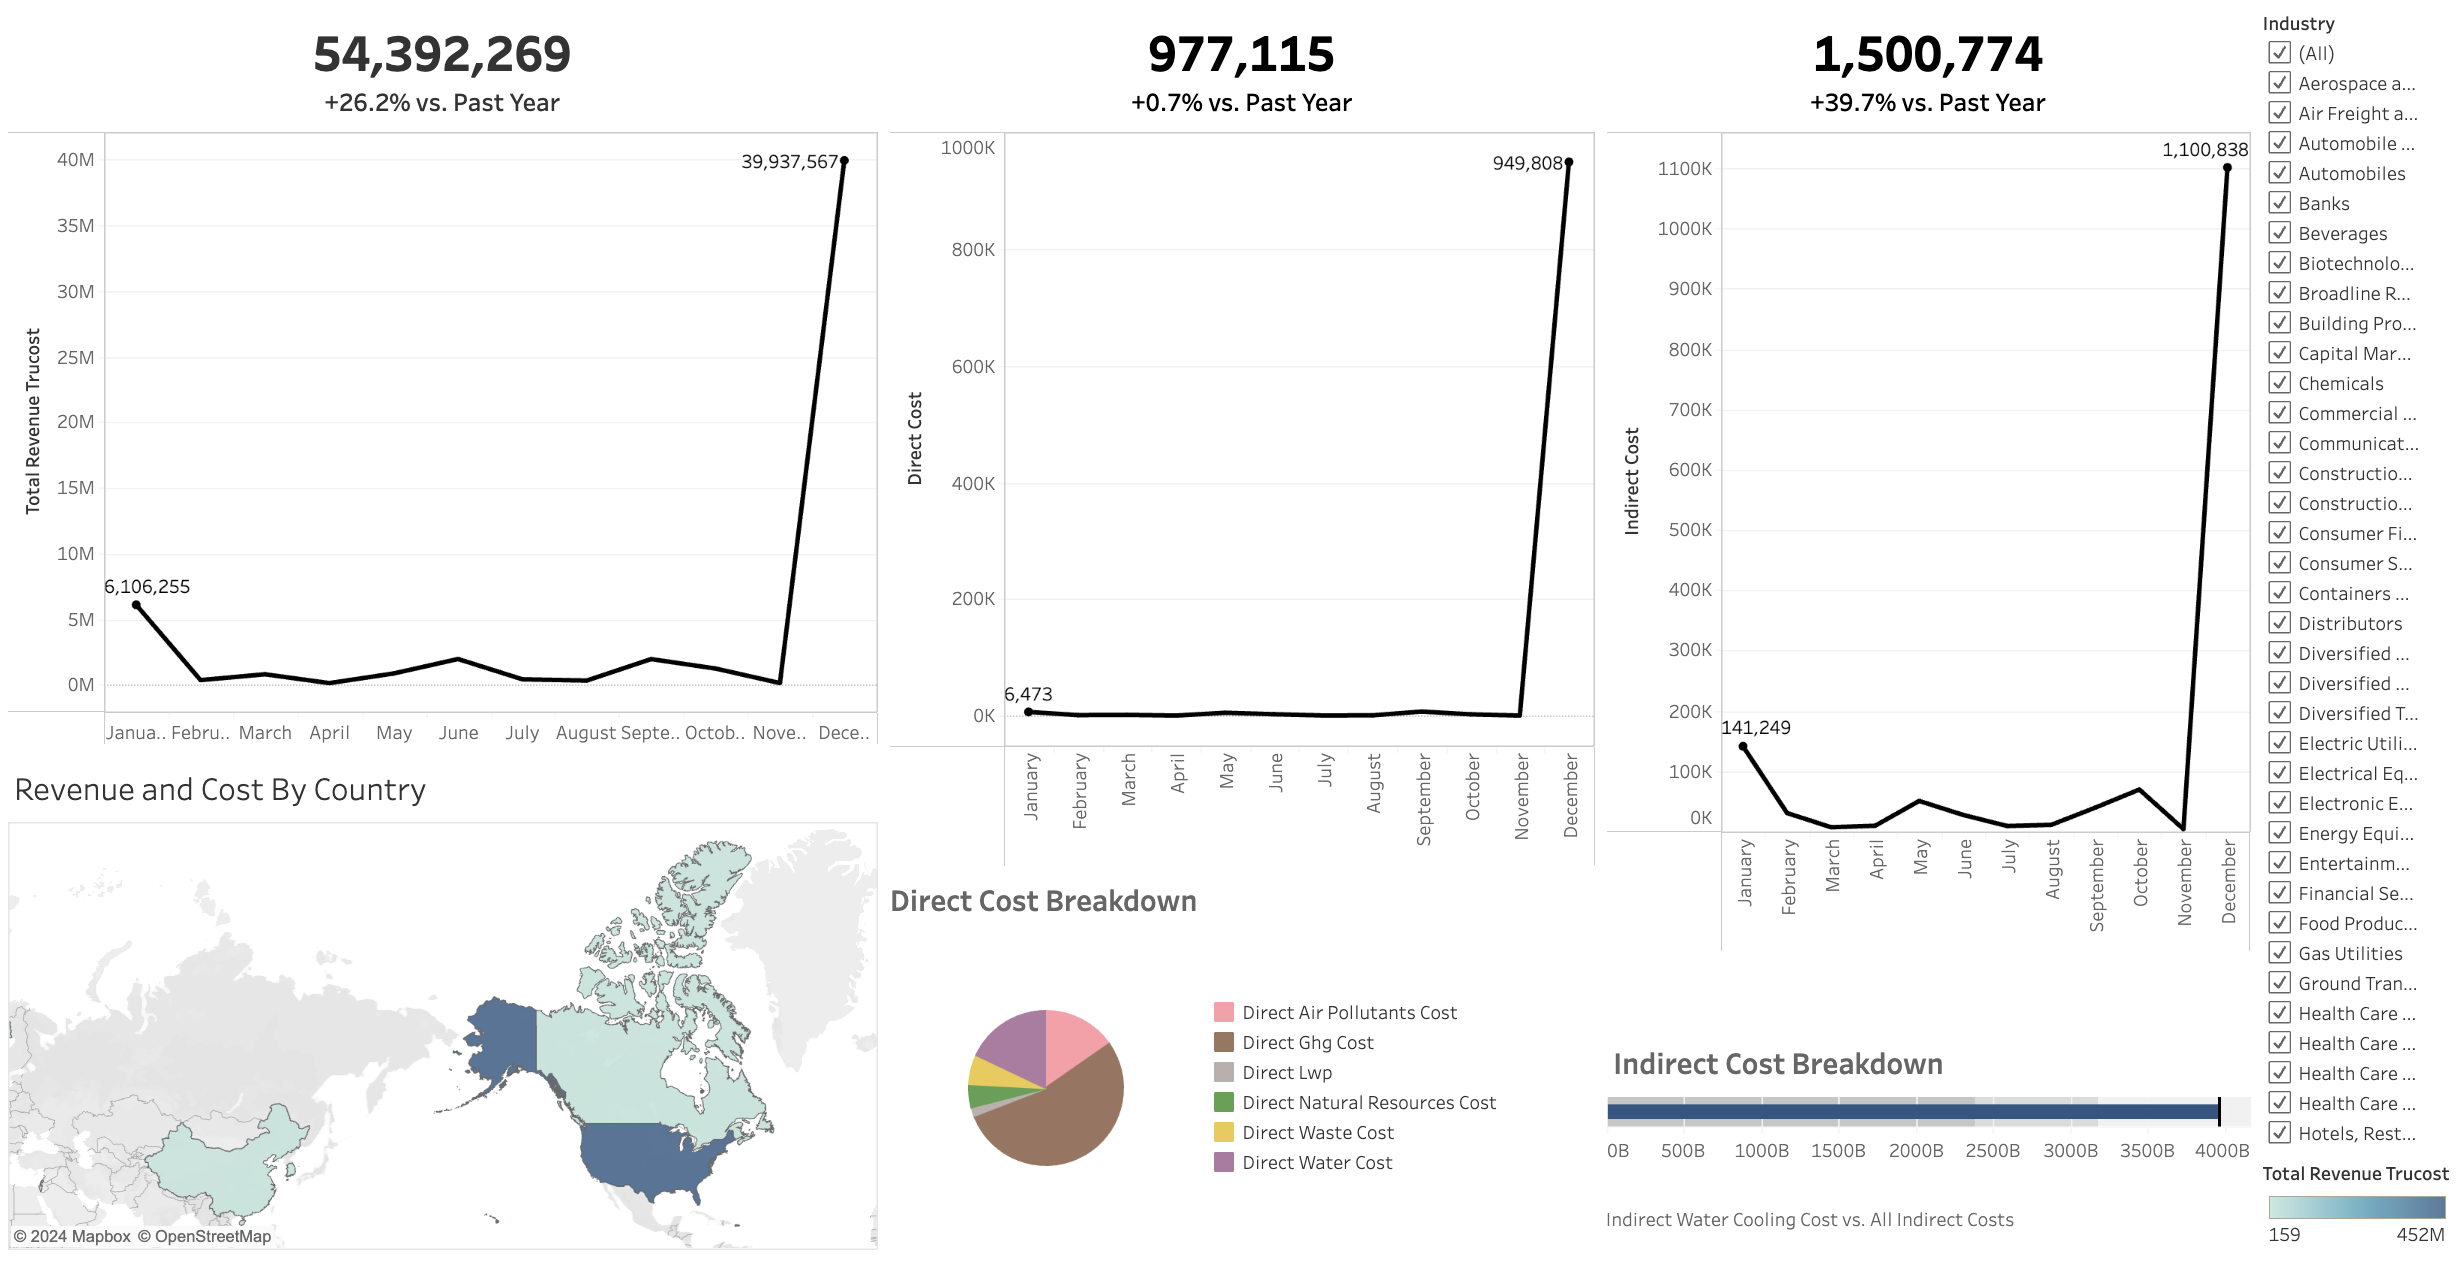

Looking at the last 12 months of the dataset, we observed major seasonal revenue spikes, peaking around October, which could impact cash flow management and resource planning.
The direct costs reveal a significant portion allocated to air pollutants and energy resources, indicating potential environmental impacts to monitor from an ESG perspective.
The indirect costs are mostly spent on water cooling, greatly out-weighing other indirect costs.
The geographic revenue breakdown suggests a concentration in certain regions, especially North America, which may present risks or opportunities for diversification and expansion into new markets.

# Conclusion

Bottom polluters prioritize eco-initiatives and minimal employee benefits to enhance profit and shareholder value, while top polluters prioritize dividends over sustainability reinvestment. Ireland's higher water and GHG costs compared to Canada may result from its water and energy-intensive industries. Ireland's indirect costs initially exceeded then dropped below Canada's, possibly due to EU environmental policies. GHG and natural resource costs adversely affect inventory turnover and sales, influencing a company's sales performance. Specifically, the direct costs associated with pollution stemming from company activities exhibit a more pronounced effect on both assets turnover and inventory turnover ratios, implying a potential adverse impact on sales. Although pollution costs also show some significance in relation to the advertising cost over sales ratio, the effect is minimal. Consequently, these findings suggest that pollution costs may not significantly influence pricing decisions or innovation within the company, given the observed lack of significance in both regression analyses. The data shows major seasonal fluctuations in revenue with an October peak, as well as substantial direct costs related to air pollutants and energy usage, highlighting potential cash flow challenges and environmental impacts to address. Additionally, the geographic concentration of revenue in North America and the disproportionately high indirect costs for water cooling present areas for further analysis and strategic considerations.

# Challenge



1. The datasets we possess are excessively large for merging, compounded by the necessity to manage three separate datasets concurrently. Consequently, we frequently encounter session crashes during these operations.

2. The initial phase of EDA is hindered by scaling issues. Certain values attributed to specific companies dominate the dataset, making it challenging to integrate all the data into a single plot, this dominance poses difficulties for visualization and comparison purposes.


# Reference


https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis

https://github.com/BA830/course_materials/blob/main/python_guide/diff_in_diff.ipynb